# SI 618 - Homework 04: Visualization, Correlation, and Linear Models

### The total score for this assignment will be 100 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, punctuation, etc. of written sentences.
- 10 pt: Code is written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions. 

In [84]:
MY_UNIQNAME = 'Tabbie'

## Download the data from: 

* [https://www.kaggle.com/datasnaek/youtube-new](https://www.kaggle.com/datasnaek/youtube-new)

> YouTube provides a list of trending videos on it's site, determined by user interaction metrics such as likes, comments, and views. This dataset includes months of daily trending video across five different regions: the United States ("US"), Canada ("CA"), Great Britain ("GB"), Germany ("DE"), and France ("FR").

* https://www.kaggle.com/abcsds/pokemon

> This data set includes 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed.

## Part 1: Answer the questions below based on the *[YouTube dataset](https://www.kaggle.com/datasnaek/youtube-new)*
- Write Python code that can answer the following questions, and
- <b>Explain your answers in plain English. </b>

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

### <span style="color:magenta">  Q1. For 15 Points: Compare the distributions of comments, views, likes, and dislikes</span>

* Plot histograms for these metrics *for the US*. What can you say about them?
* Try to apply a log transformation, and plot the histograms again. How do they look now?
* Create a pairplot *for the US*, as we did in this week's lab. Do you see anything interesting?
* Create additional pairplots for the other four regions. Do they look similar?

In [86]:
youtube_US = pd.read_csv('youtube-new/USvideos.csv')
youtube_US

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


[(0, 200000)]

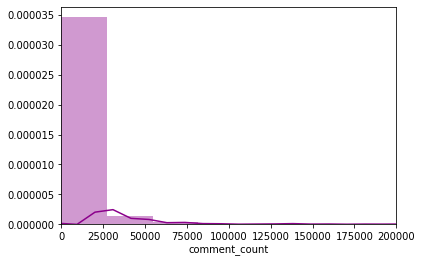

In [87]:
US_comments = youtube_US["comment_count"]
sns.distplot(US_comments, kde=True, color = "darkmagenta").set(xlim=(0, 200000))

The histogram of the comments on videos from the country US is a positively skewed histogram showing that almost all the values are on the left most range of the histogram. The maximum frequency of the data is between the range 0-25000.

[(0, 20000000)]

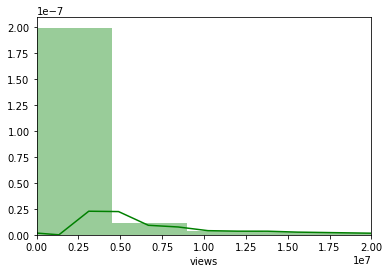

In [88]:
US_views = youtube_US["views"]
sns.distplot(US_views, kde=True, color = "green").set(xlim=(0,20000000))

The histogram of the views on videos from the country US is a positively skewed histogram showing that almost all the values are on the left most range of the histogram. The maximum frequency of the data is between the 0-50000000.

[(0, 500000)]

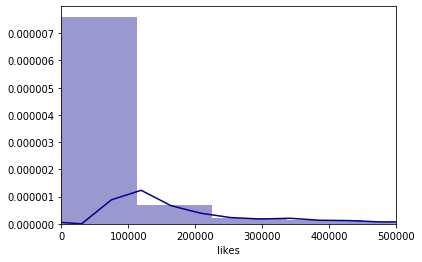

In [89]:
US_likes = youtube_US["likes"]
sns.distplot(US_likes, kde=True, color = "darkblue").set(xlim=(0, 500000))

The histogram of the likes on videos from the country US is a positively skewed histogram showing that almost all the values are on the left most range of the histogram. The maximum frequency of the data is between the range 0-100000.

[(0, 200000)]

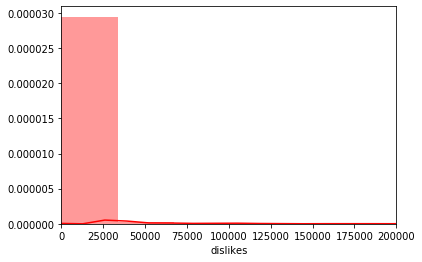

In [90]:
US_dislikes = youtube_US["dislikes"]
sns.distplot(US_dislikes, kde=True, color = "red").set(xlim=(0, 200000))

The histogram of the dislikes on videos from the country US is a positively skewed histogram showing that almost all the values are on the left most range of the histogram. The maximum frequency of the data is between the range 0-25000.

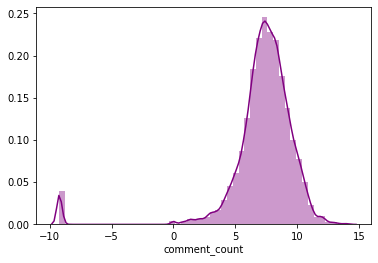

In [91]:
US_comments_log = np.log(US_comments + 0.0001)
sns.distplot(US_comments_log,kde=True, color = "purple")

[(-10, 10)]

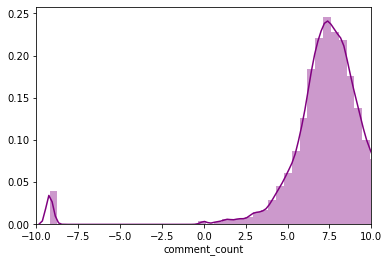

In [92]:
sns.distplot(US_comments_log,kde=True, color = "purple").set(xlim=(-10, 10))

The log histogram of comments shows difference in the structure of the data frequency.The histogram is left skewed and we can observe that log transformation of the comment_count column values of the youtube_US dataframe reduces the zero count in the data and pushes the data distribution to the right. The maximum frequency of data is now at 7.5. 

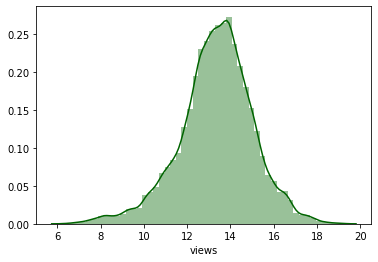

In [93]:
US_views_log = np.log(US_views + 0.0001)
sns.distplot(US_views_log,kde=True, color = "darkgreen")

[(12, 16)]

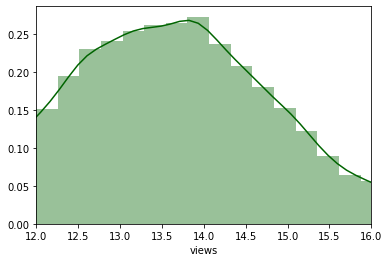

In [94]:
sns.distplot(US_views_log,kde=True, color = "darkgreen").set(xlim=(12, 16))

The log histogram of views shows difference in the structure of the data frequency.The histogram is left skewed and we can observe that log transformation of the views column values of the youtube_US dataframe removes the zero count in the data and pushes the data distribution to the right. The maximum frequency of data is now at 14.0.  

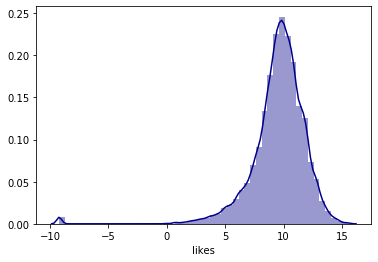

In [95]:
US_likes_log = np.log(US_likes + 0.0001)
sns.distplot(US_likes_log,kde=True, color = "darkblue")

[(0, 15)]

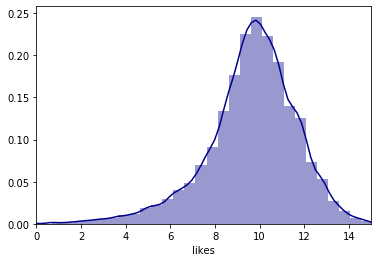

In [96]:
sns.distplot(US_likes_log,kde=True, color = "darkblue").set(xlim=(0, 15))

The log histogram of likes shows difference in the structure of the data frequency.The histogram is left skewed and we can observe that log transformation of the likes column values of the youtube_US dataframe reduces the zero count in the data and pushes the data distribution to the right. The maximum frequency of data is now at 10. 

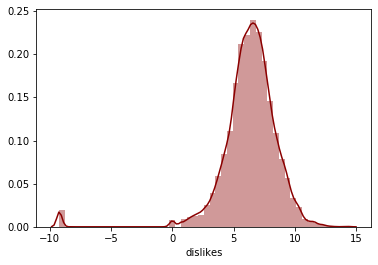

In [97]:
US_dislikes_log = np.log(US_dislikes + 0.0001)
sns.distplot(US_dislikes_log,kde=True, color = "darkred")

[(0, 8)]

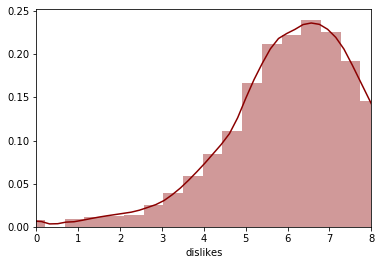

In [98]:
sns.distplot(US_dislikes_log,kde=True, color = "darkred").set(xlim=(0,8))

The log histogram of dislikes shows difference in the structure of the data frequency.The histogram is left skewed and we can observe that log transformation of the dislikes column values of the youtube_US dataframe reduces the zero count in the data and pushes the data distribution to the right. The maximum frequency of data is now at 6.5. 

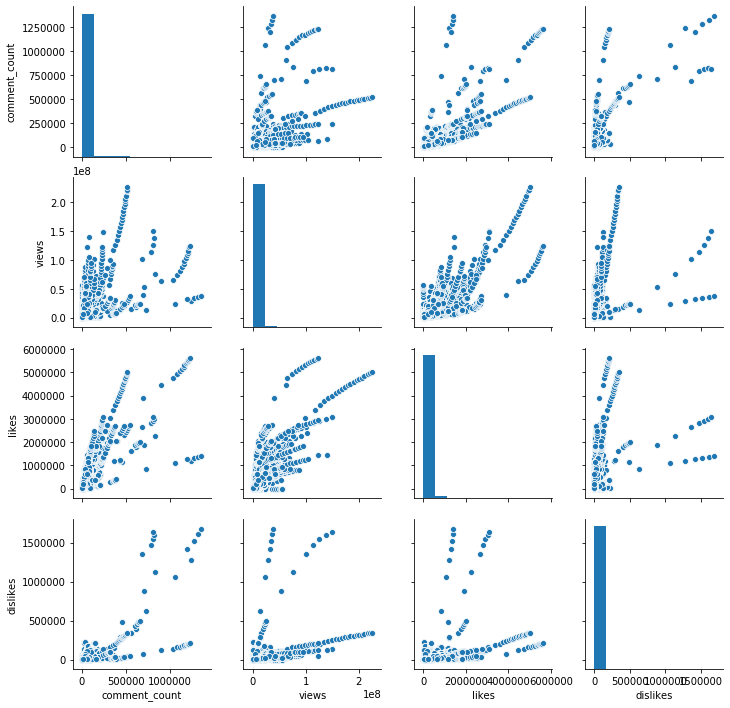

In [99]:
sns.pairplot(youtube_US,vars=['comment_count','views','likes','dislikes'])

While observing the scatterplots in the US videos pairplot above, they appear as waterspray or fireworks. The data is clustered at zero and spreads along the x and y axes.The histograms are right skewed. Both the scatterplots and the histograms indicate that the maximum frequency of data is near zero. 

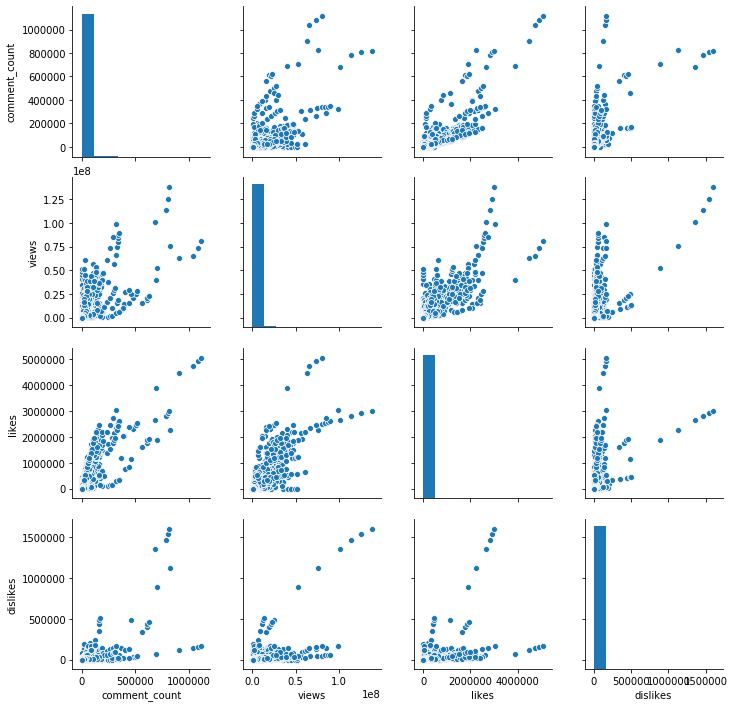

In [100]:
youtube_CA = pd.read_csv('youtube-new/CAvideos.csv')              #Canada
sns.pairplot(youtube_CA,vars=['comment_count','views','likes','dislikes'])

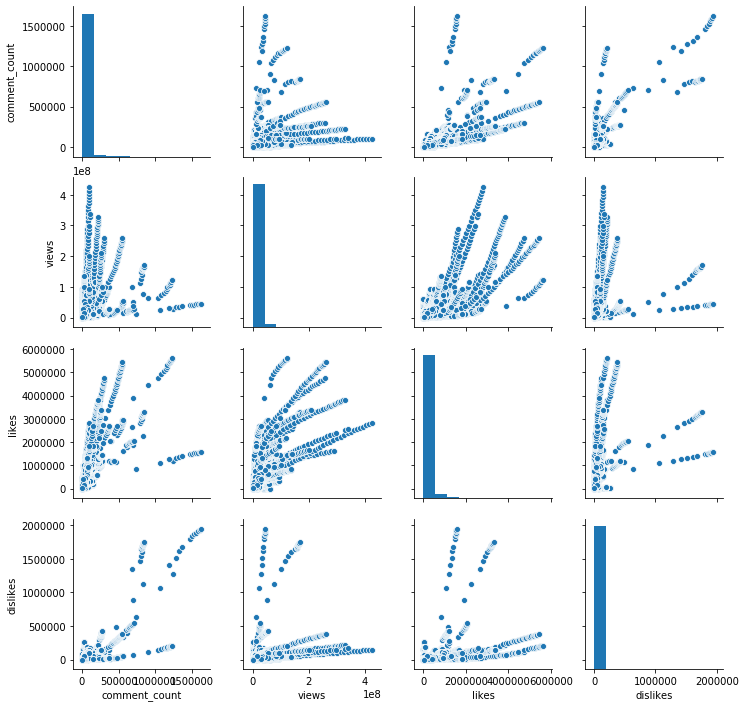

In [101]:
youtube_GB = pd.read_csv('youtube-new/GBvideos.csv')                #GreatBritain
sns.pairplot(youtube_GB,vars=['comment_count','views','likes','dislikes'])

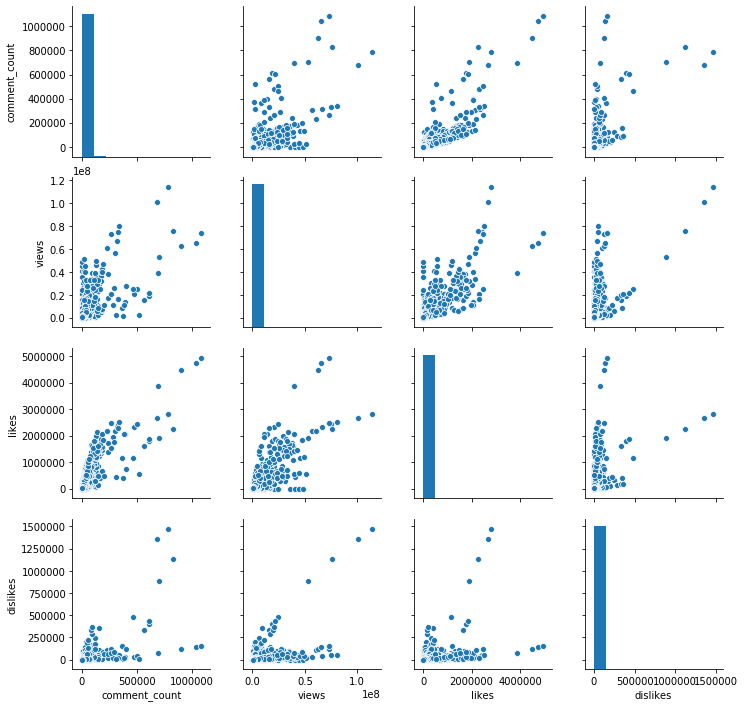

In [102]:
youtube_DE = pd.read_csv('youtube-new/DEvideos.csv')                            #Germany
sns.pairplot(youtube_DE,vars=['comment_count','views','likes','dislikes'])

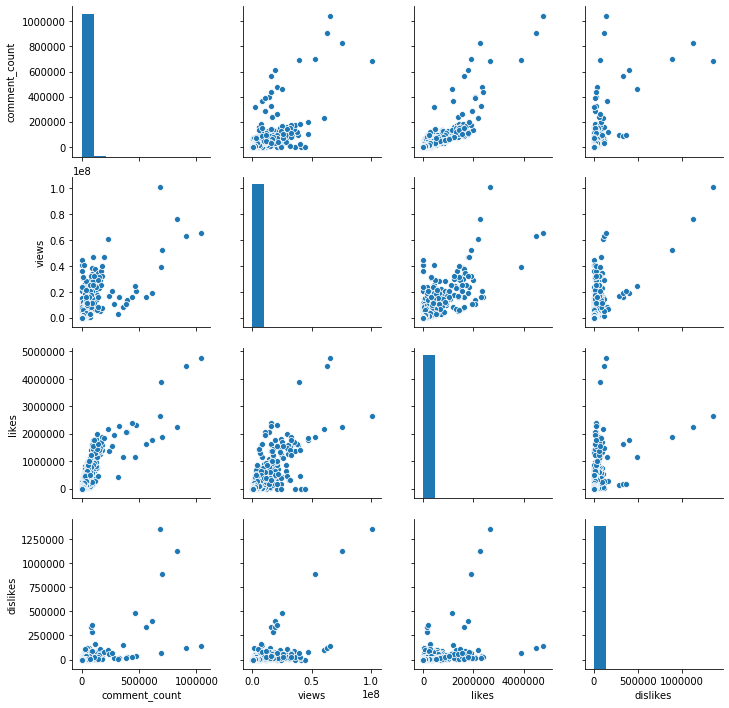

In [103]:
youtube_FR = pd.read_csv('youtube-new/FRvideos.csv')                                  #France
sns.pairplot(youtube_FR,vars=['comment_count','views','likes','dislikes'])

While observing the above four pairplots, they do show similarity to the US videos pairplot. The scatterplots in all the pairplots appear as waterspray or fireworks. The data is clustered at zero and spreads along the x and y axes.The histograms are right skewed. Both the scatterplots and the histograms indicate that the maximum frequency of data is near zero.

### <span style="color:magenta"> Q2. For 10 Points: Create a heatmap of correlations between the variables for a region of your choice </span>

>A [heat map (or heatmap)](https://en.wikipedia.org/wiki/Heat_map) is a graphical representation of data where the individual values contained in a matrix are represented as colors.

Seaborn makes it easy to create a heatmap with [`seaborn.heatmap()`](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

* Create a correlation matrix for your numeric variables using Pandas with [`DataFrame.corr()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html). That is, if your dataframe is called `df`, use `df.corr()`.
* Pass in your correlation matrix to `seaborn.heatmap()`, and annotate it with the parameter `annot=True`.
* Are there any interesting correlations? What are they?

In [104]:
GB_corr = youtube_GB.corr()
GB_corr

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,1.000000,-0.171061,-0.182160,-0.021025,-0.058629,0.032701,-0.056384,-0.007022
views,-0.171061,1.000000,0.795862,0.392407,0.466899,-0.006124,0.013486,0.009810
likes,-0.182160,0.795862,1.000000,0.446746,0.744361,-0.041698,-0.032246,0.008464
dislikes,-0.021025,0.392407,0.446746,1.000000,0.771772,-0.008935,-0.012534,0.011462
comment_count,-0.058629,0.466899,0.744361,0.771772,1.000000,-0.034527,-0.021059,0.003674
comments_disabled,0.032701,-0.006124,-0.041698,-0.008935,-0.034527,1.000000,0.514951,-0.005633
ratings_disabled,-0.056384,0.013486,-0.032246,-0.012534,-0.021059,0.514951,1.000000,-0.003536
video_error_or_removed,-0.007022,0.009810,0.008464,0.011462,0.003674,-0.005633,-0.003536,1.000000


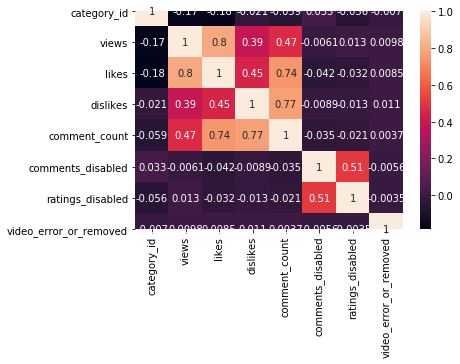

In [105]:
sns.heatmap(GB_corr, annot = True)

The seaborn heatmap is a large square comprising of small squares of various shades and variables aligned on the bottom and left side of it. The squares in the heat map represent the correlation coefficient of two variables between the variables seen at the bottom and on the left side. The shade bar on the right helps us understand how strong is the correlation between the two variables in each box. The darker the shade the more negative is the correlation as we can see in the shade bar on the right. Each square has a numerical value in it which gives the exact correlation coefficient of the respective two variables. We can observe that the most negatively correlated variables of the Great Britain youtube videos dataframe are category_id and views with a numerical value of -0.17. The most positively correlated variables are views and likes with a numerical value of 0.8. The second most positively correlated variables are comment_count and dislikes with a numerical value of 0.77. Comment_count and likes have a correlation coefficient of 0.74 and that of dislikes and views is 0.39. Hence we understand that people still watch the videos even if they dislike it or for that matter if others dislike it.

### <span style="color:magenta"> Q3. For 15 points: Create and compare OLS models using variables of your choice, for a region of your choice </span>
* Use statsmodels to perform an ANOVA (categorical regression) of a variable of your choice as the dependent variable (for example, views) and the video category as the independent variable. 
* Provide your interpretation of the results. 
* Create two different regression models where the dependent variables are the same, and the independent variables are different. What does your interpretation say about the two models?

In [106]:
vid_views = smf.ols('views ~ C(video_error_or_removed)', data = youtube_US).fit()  #y~x, y represents outcome/dependent variable and x represents independent variable
vid_views.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  views   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2084
Date:                Sun, 23 Feb 2020   Prob (F-statistic):              0.648
Time:                        23:59:57   Log-Likelihood:            -7.0576e+05
No. Observations:               40949   AIC:                         1.412e+06
Df Residuals:                   40947   BIC:                         1.412e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                          2.361e+06   3.66e+04     64.601      0.000    2.29e+06    2.43e+06
C(video_error_or_removed)[T.True] -7.041e+05   1.54e+06     -0.457      0.648   -3.73e+06    2.32e+06
==============================================================================
Omnibus:                    71138.181   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         93135896.397
Skew:                          12.240   Prob(JB):                         0.00
Kurtosis:                     235.352   Cond. No.                         42.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
vid_views_anova = sm.stats.anova_lm(vid_views, typ=2)
print(vid_views_anova)

                                 sum_sq       df        F    PR(>F)
C(video_error_or_removed)  1.139568e+13      1.0  0.20843  0.648003
Residual                   2.238735e+18  40947.0      NaN       NaN


In the regression table with views as the outcome/dependent variable and videos error/removed as the independent variable we can observe the R-squared value is 0 which means the regression model is not a good fit.  Even though the F-statistic is greater than 0.05, the p value is 0 which is less that 0.05 and that establishes that the two variables in the model are significantly different and the model is a good fit. Therefore we accept that there is variability in the model as the p-value is more stronger than F-statistic for interpretation even though the R-square value is 0.

In [108]:
commd_views = smf.ols('views ~ C(comments_disabled)', data = youtube_US).fit()
commd_views.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  views   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2934
Date:                Sun, 23 Feb 2020   Prob (F-statistic):              0.588
Time:                        23:59:57   Log-Likelihood:            -7.0576e+05
No. Observations:               40949   AIC:                         1.412e+06
Df Residuals:                   40947   BIC:                         1.412e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                     2.358e+06   3.68e+04     64.040      0.000    2.29e+06    2.43e+06
C(comments_disabled)[T.True]  1.604e+05   2.96e+05      0.542      0.588    -4.2e+05    7.41e+05
==============================================================================
Omnibus:                    71139.507   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         93147742.680
Skew:                          12.240   Prob(JB):                         0.00
Kurtosis:                     235.366   Cond. No.                         8.11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
commd_views_anova = sm.stats.anova_lm(commd_views, typ=2)
print(commd_views_anova)

                            sum_sq       df         F    PR(>F)
C(comments_disabled)  1.604192e+13      1.0  0.293411  0.588046
Residual              2.238731e+18  40947.0       NaN       NaN


In the regression table with views as the outcome/dependent variable and comments disabled as the independent variable we can observe the R-squared value is 0 which means the regression model is not a good fit.  Even though the F-statistic is greater than 0.05, the p value is 0 which is less that 0.05 and that establishes that the two variables in the model are significantly different and the model is a good fit. Therefore we accept that there is variability in the model as the p-value is more stronger than F-statistic for interpretation even though the R-square value is 0.

In [110]:
ratd_views = smf.ols('views ~ C(ratings_disabled)', data = youtube_US).fit()
ratd_views.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  views   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     9.656
Date:                Sun, 23 Feb 2020   Prob (F-statistic):            0.00189
Time:                        23:59:57   Log-Likelihood:            -7.0576e+05
No. Observations:               40949   AIC:                         1.412e+06
Df Residuals:                   40947   BIC:                         1.412e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                    2.353e+06   3.66e+04     64.283      0.000    2.28e+06    2.43e+06
C(ratings_disabled)[T.True]  1.771e+06    5.7e+05      3.107      0.002    6.54e+05    2.89e+06
==============================================================================
Omnibus:                    71139.956   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         93219689.317
Skew:                          12.240   Prob(JB):                         0.00
Kurtosis:                     235.457   Cond. No.                         15.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
ratd_views_anova = sm.stats.anova_lm(ratd_views, typ=2)
print(ratd_views_anova)

                           sum_sq       df         F    PR(>F)
C(ratings_disabled)  5.278348e+14      1.0  9.656451  0.001888
Residual             2.238219e+18  40947.0       NaN       NaN


In the regression table with views as the outcome/dependent variable and ratings disabled as the independent variable we can observe the R-squared value is 0 which means the regression model is not a good fit.  Even though the F-statistic is greater than 0.05, the p value is 0 which is less that 0.05 and that establishes that the two variables in the model are significantly different and the model is a good fit. Therefore we accept that there is variability in the model as the p-value is more stronger than F-statistic for interpretation even though the R-square value is 0.

## Part 2: Answer the questions below based on the *[Pokémon dataset](https://www.kaggle.com/abcsds/pokemon)* </span>
- Write Python code that can answer the following questions, and
- Explain your answers in plain English. 

In [112]:
Pok = pd.read_csv('pokemon/Pokemon.csv')
Pok

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


### <span style="color:magenta"> Q4. For 10 Points: Plot the pairs of different ability points (HP, Attack, Sp. Attack, Defense, etc.). </span>

* Which pairs have the most/least correlation coefficients?

In [113]:
pok_corr = Pok.corr()
pok_corr

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,1.000000,0.119813,0.097614,0.102298,0.094786,0.088759,0.085817,0.010733,0.982516,0.153396
Total,0.119813,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384,0.501758
HP,0.097614,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.102298,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.094786,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.088759,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.085817,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.010733,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.982516,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.153396,0.501758,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


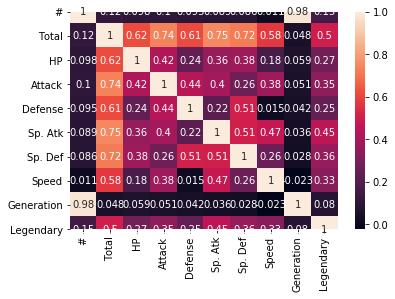

In [114]:
sns.heatmap(pok_corr, annot = True)

From the heat map above we can see that Defense and Speed have the lowest correlation coefficient with the darkest coloured box and the numerical value being 0.015. The highest correlation coefficient is seen between Defense and Sp.Def, Sp.Atk and Sp.Def with the numerical value of 0.51.

### <span style="color:magenta"> Q5. For 15 Points: Plot the distribution of ability points per Pokémon type </span>

* How would you describe each Pokémon type with different ability points?

In [115]:
type1_pok = Pok['Type 1'].unique()
type1_pok

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

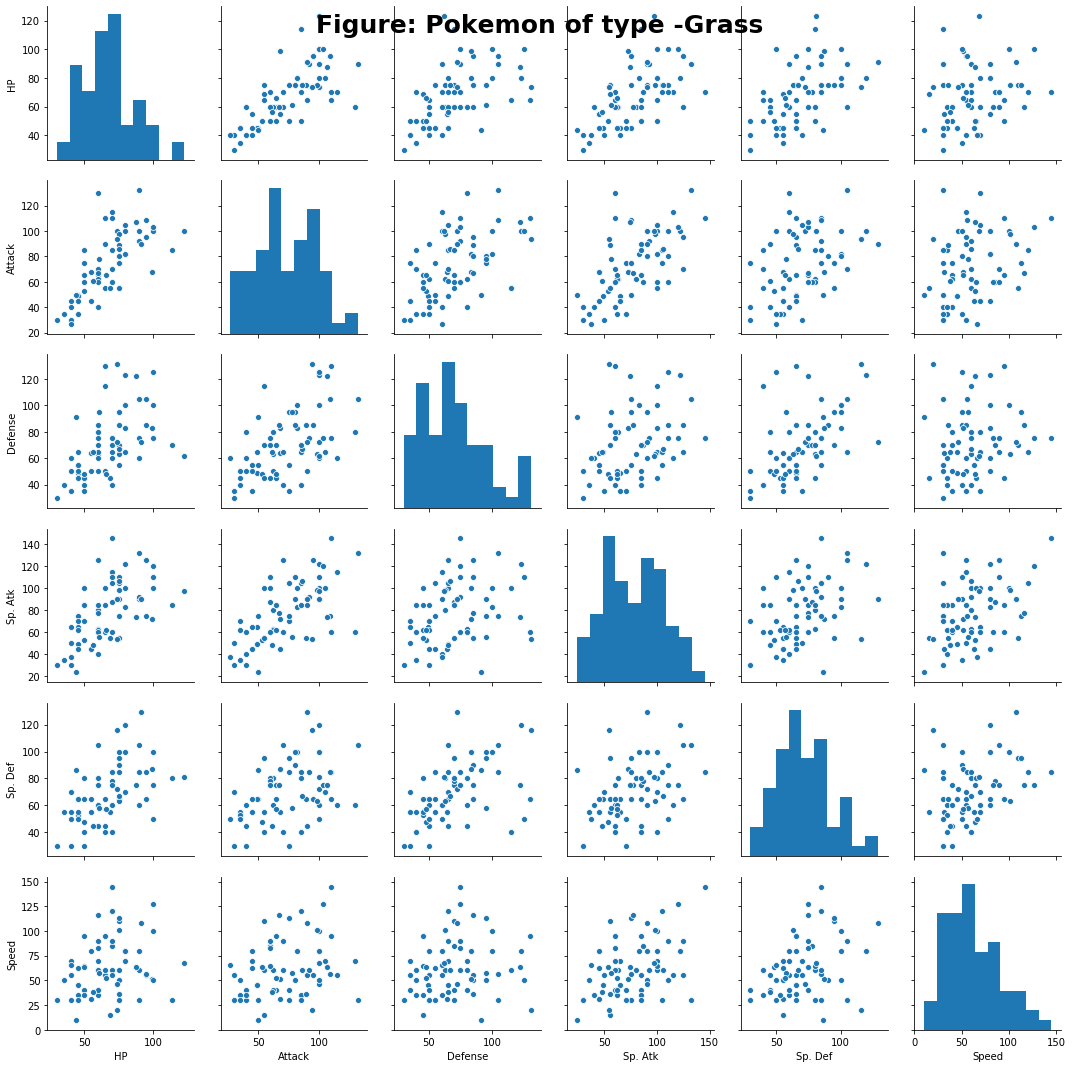

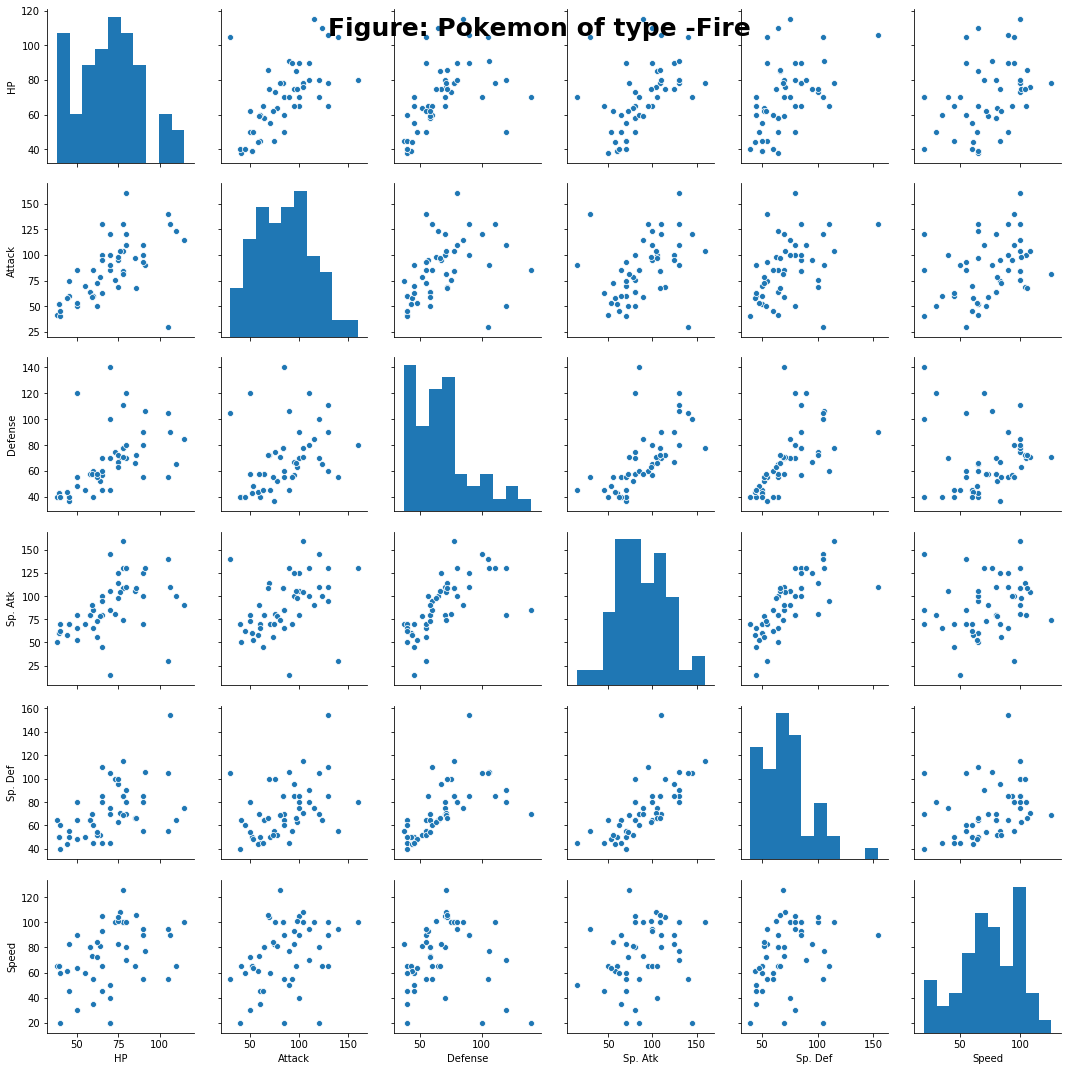

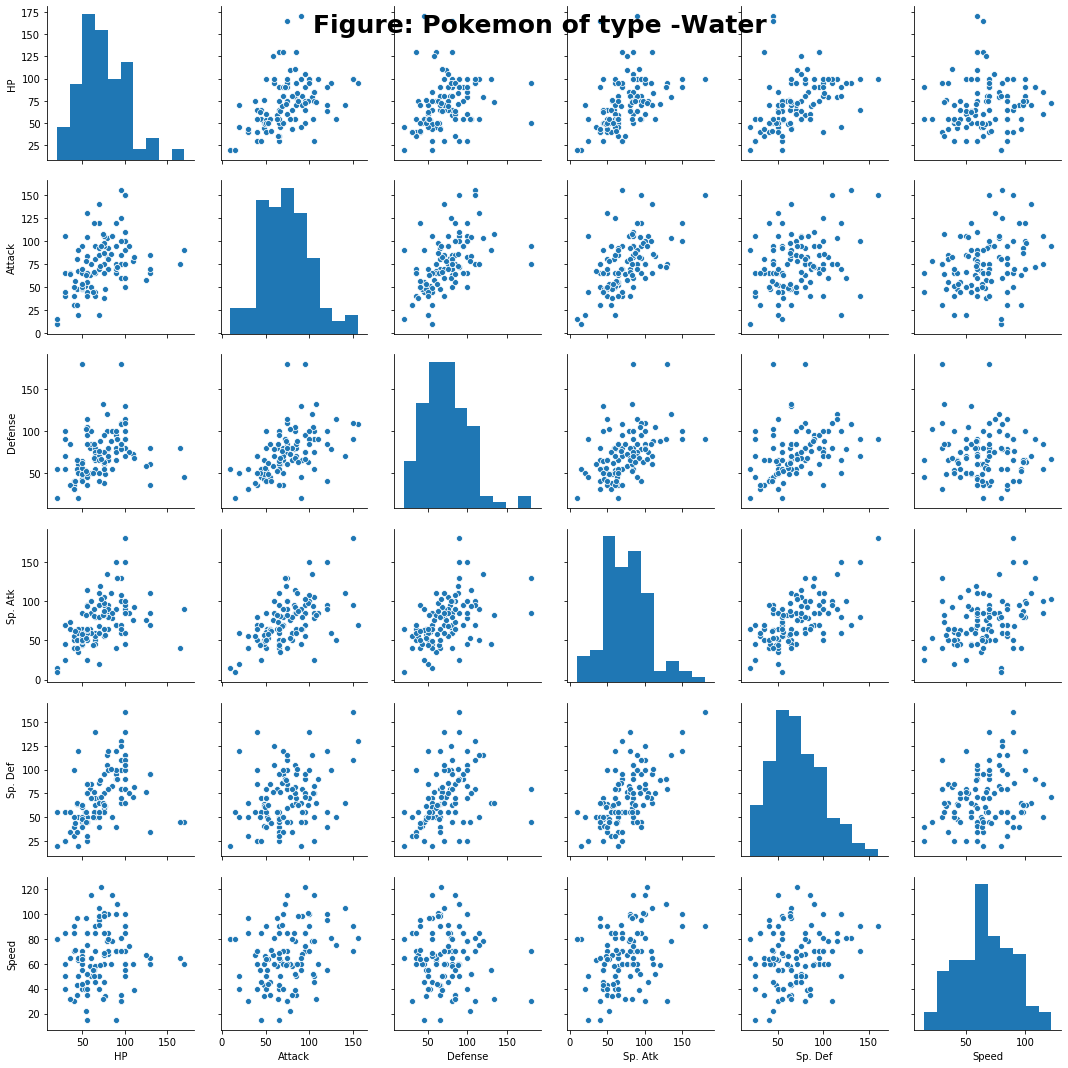

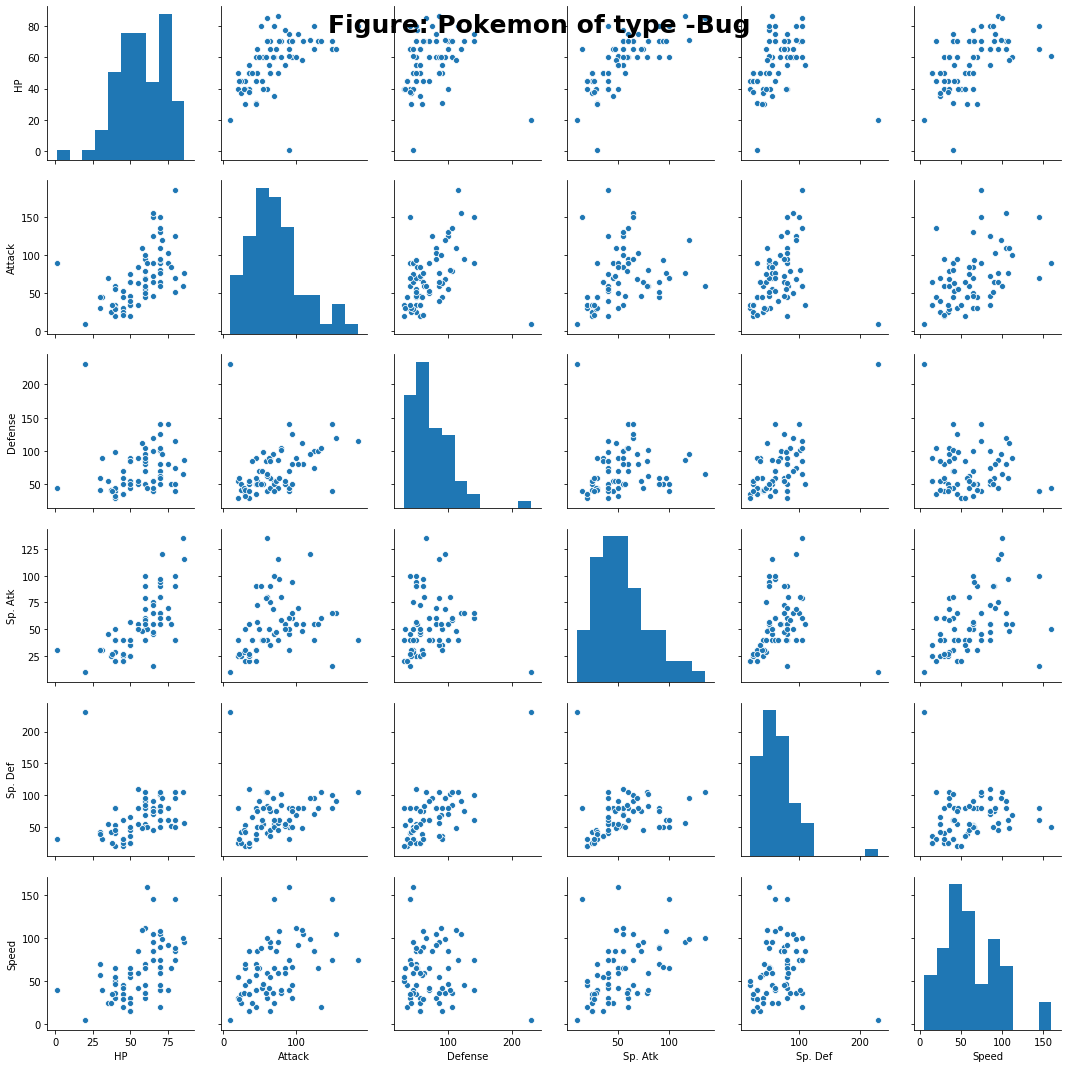

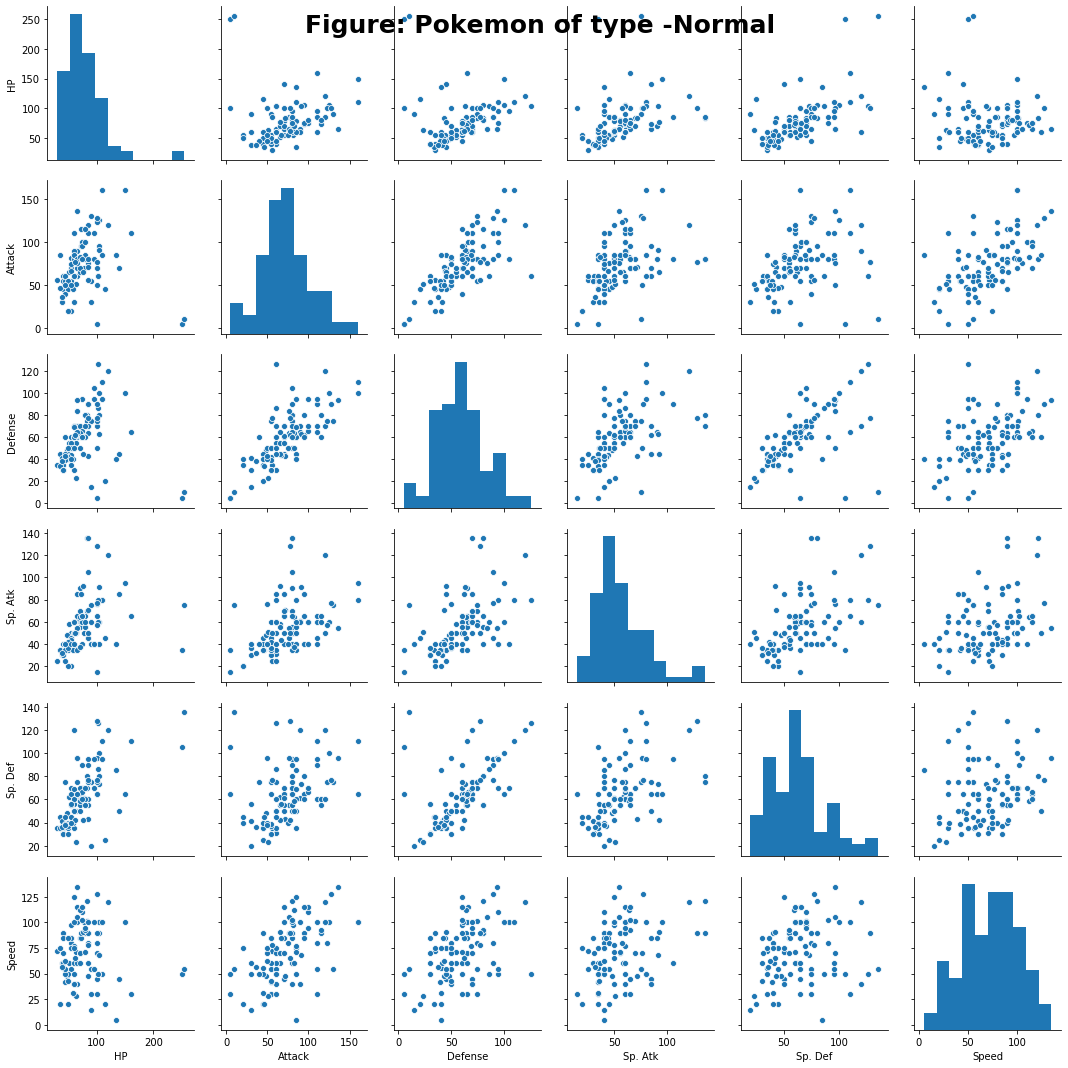

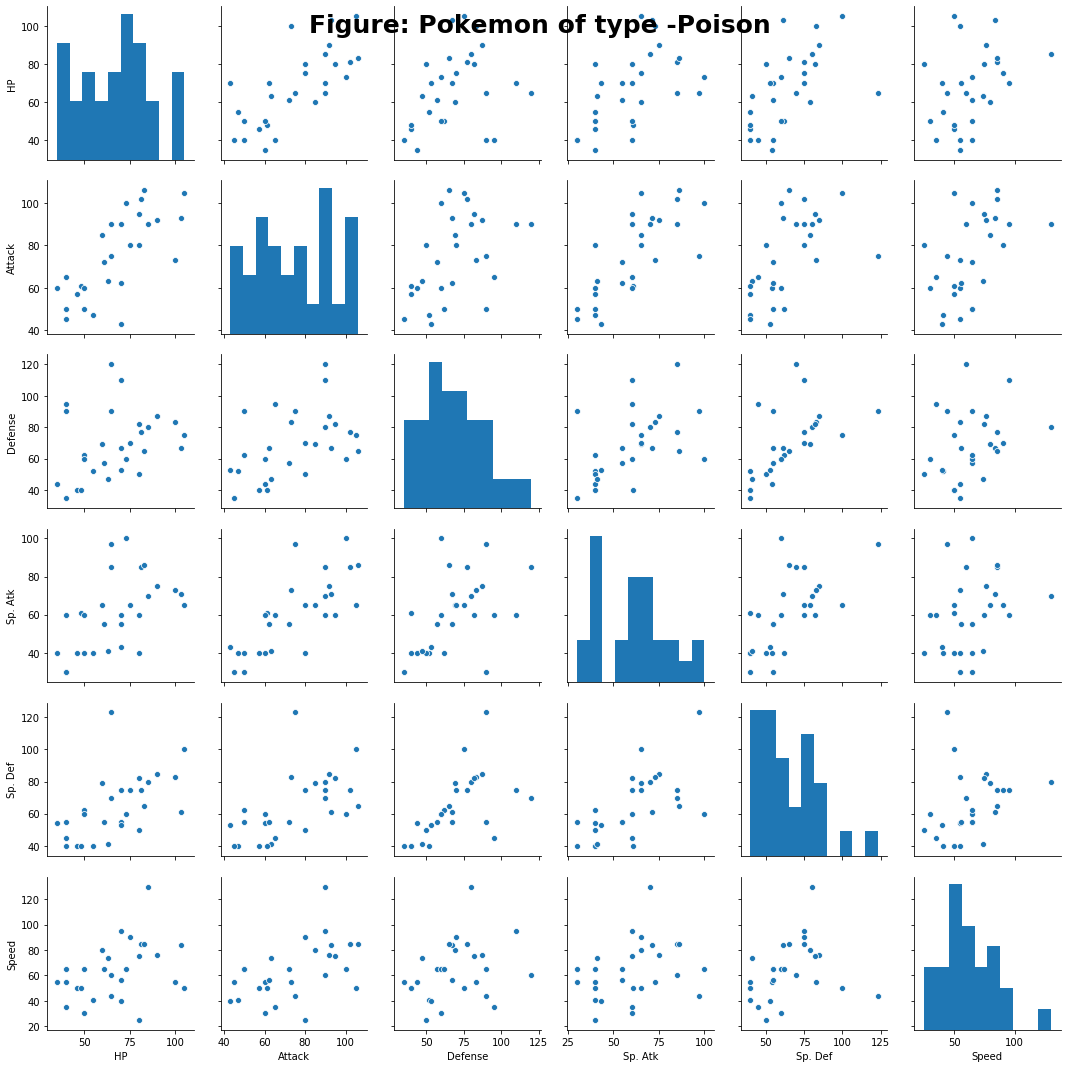

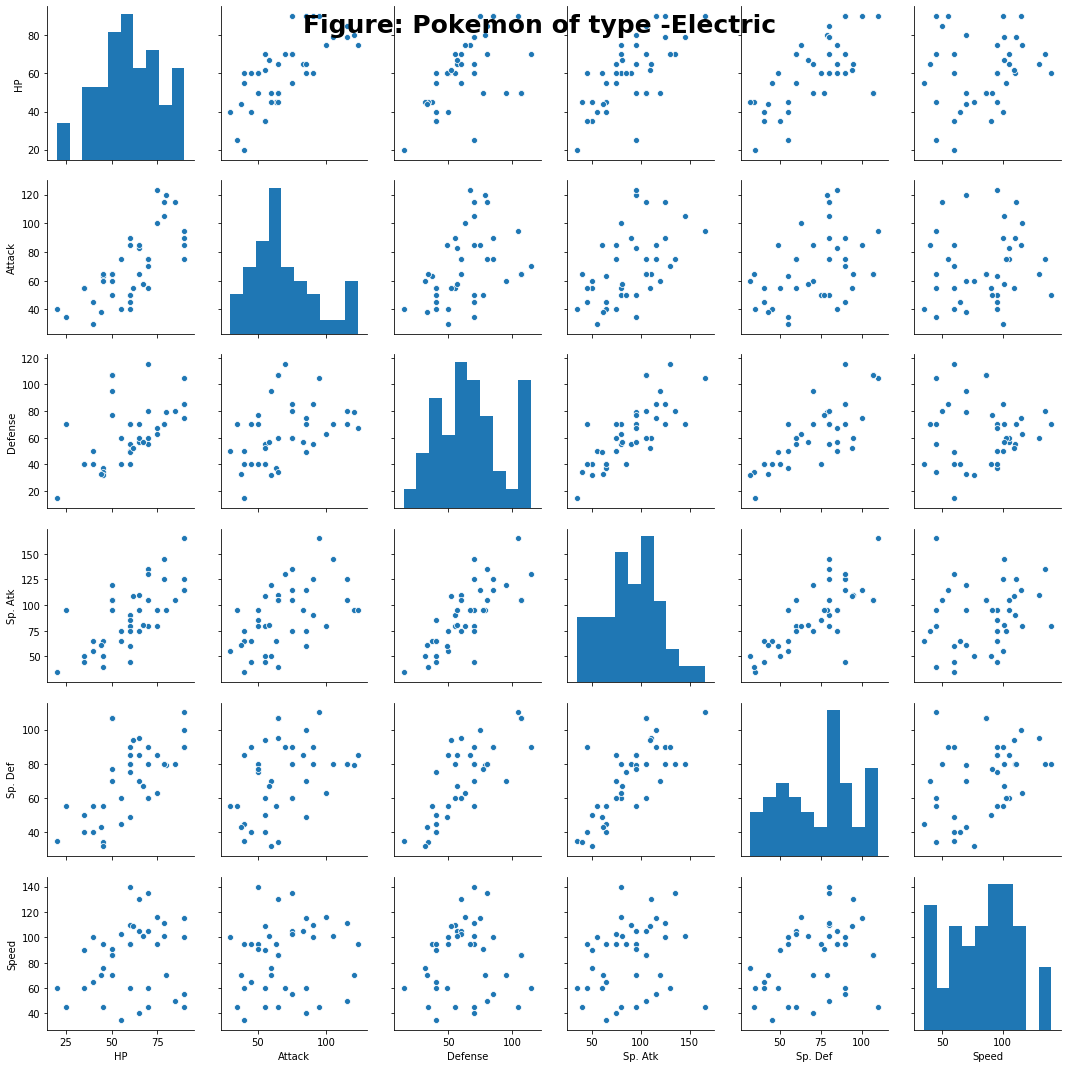

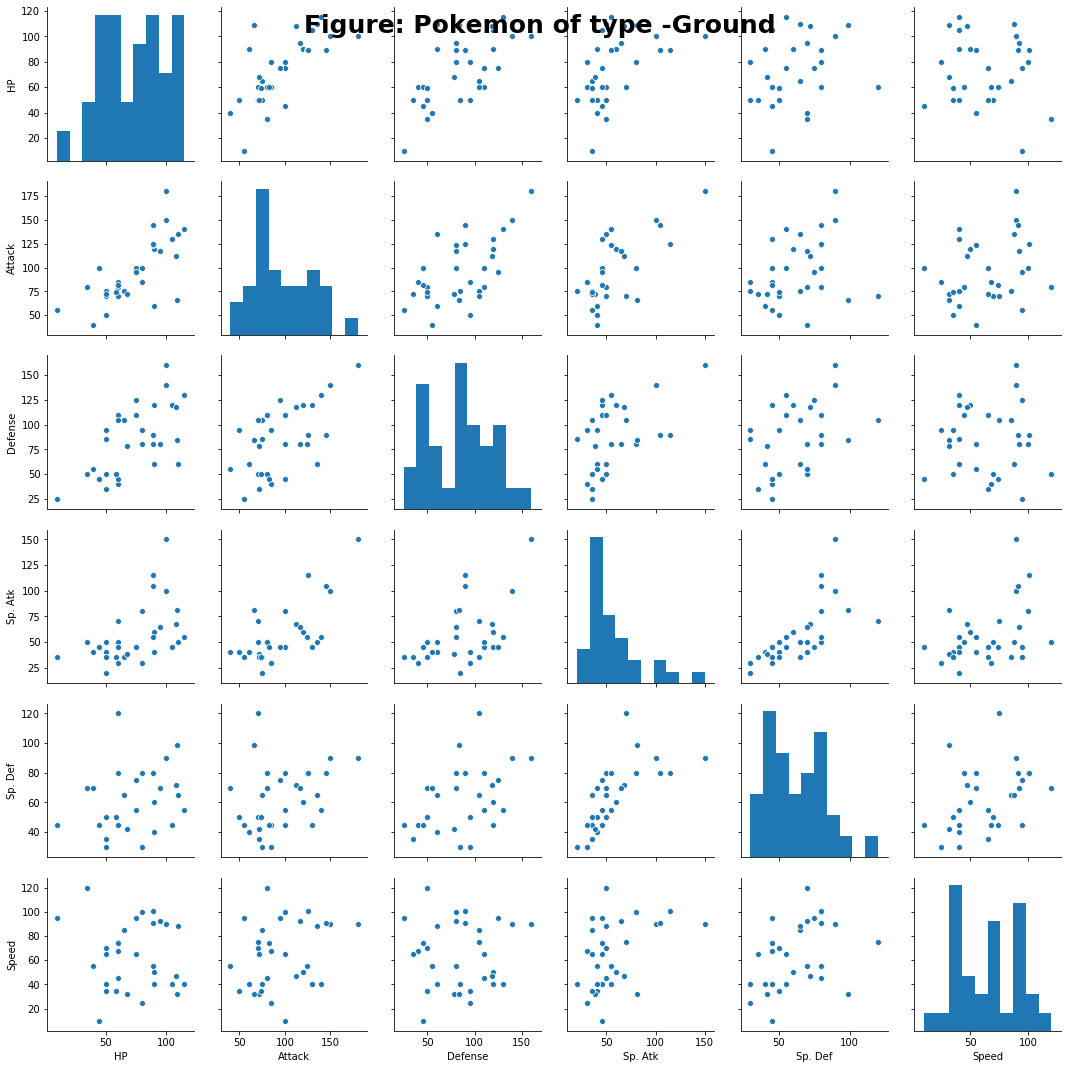

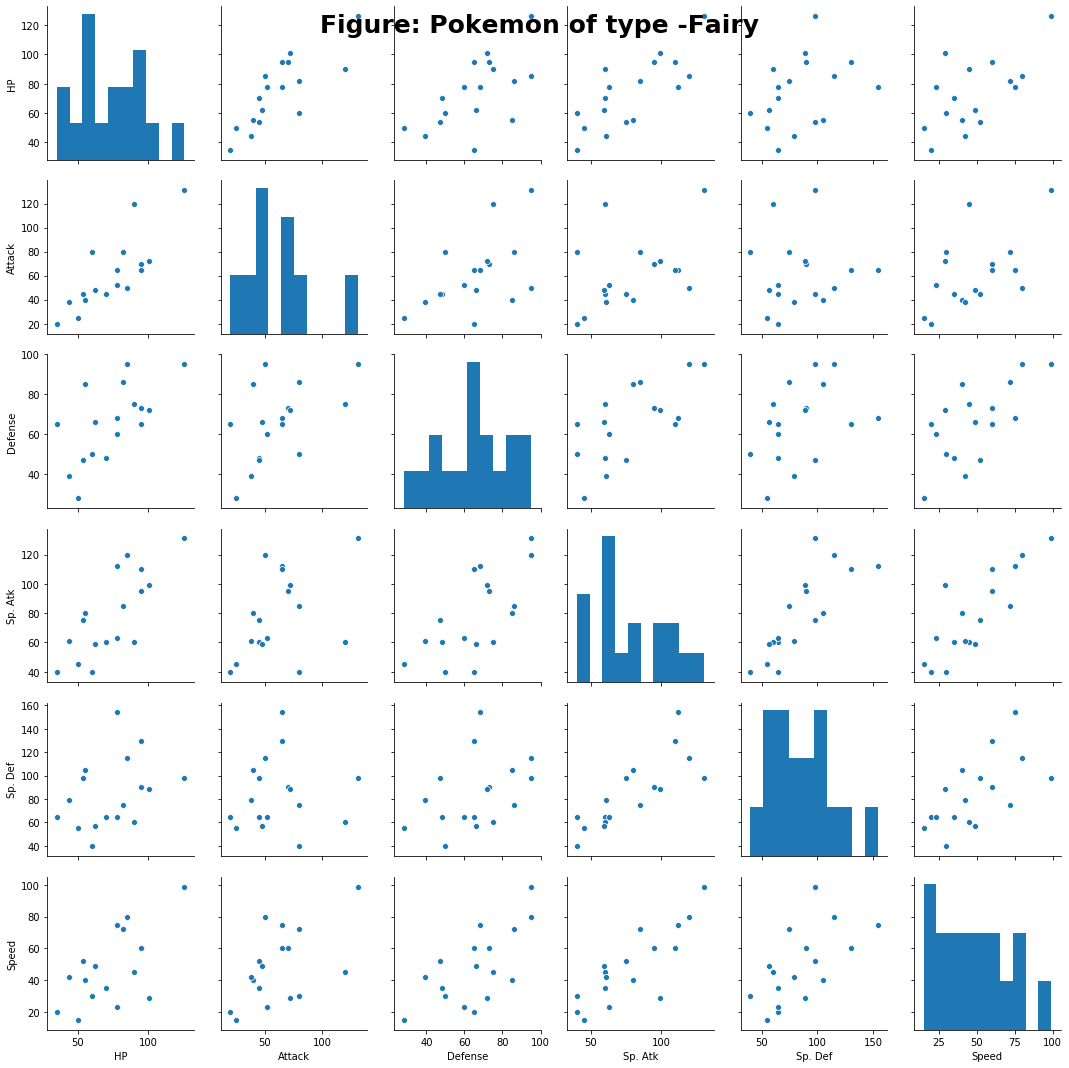

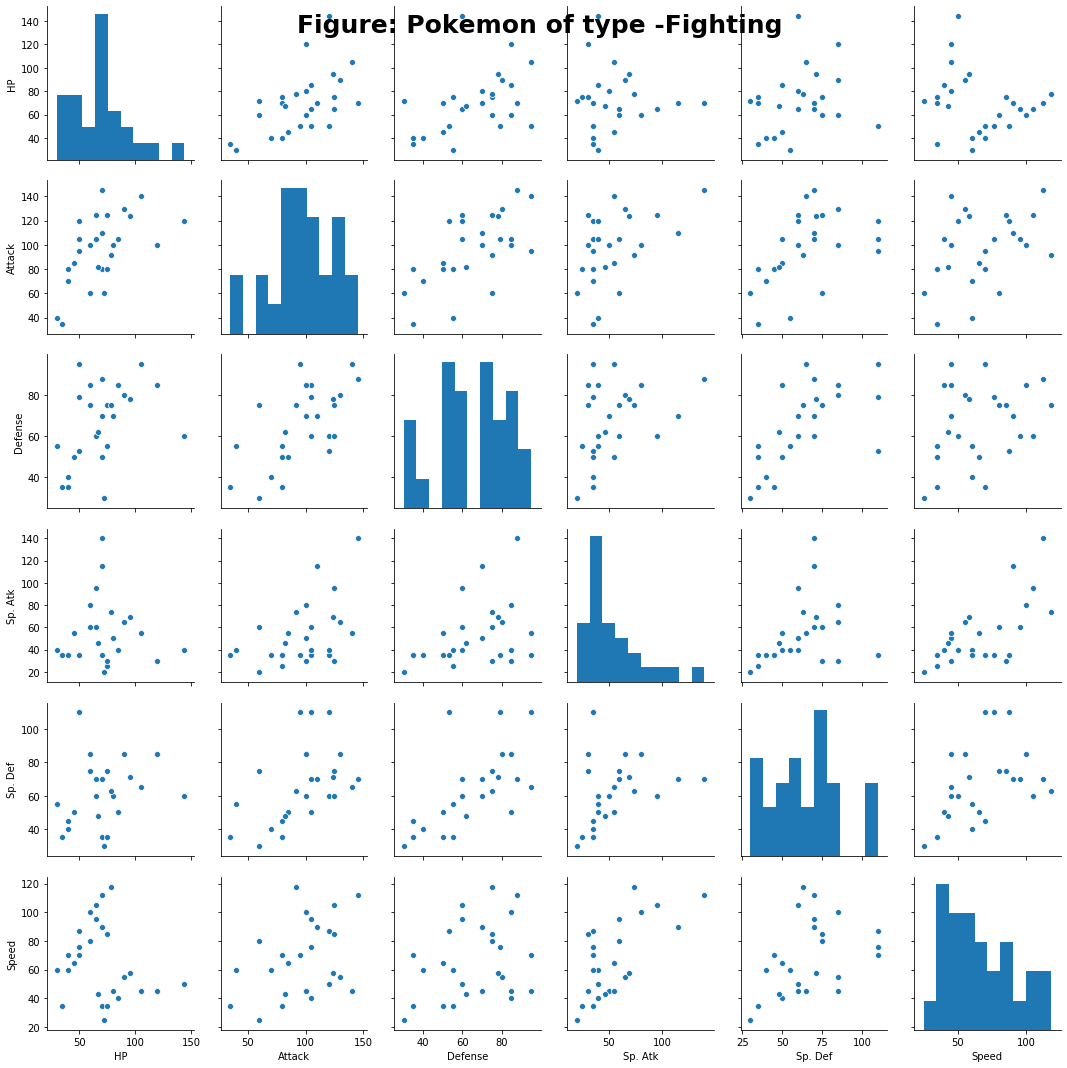

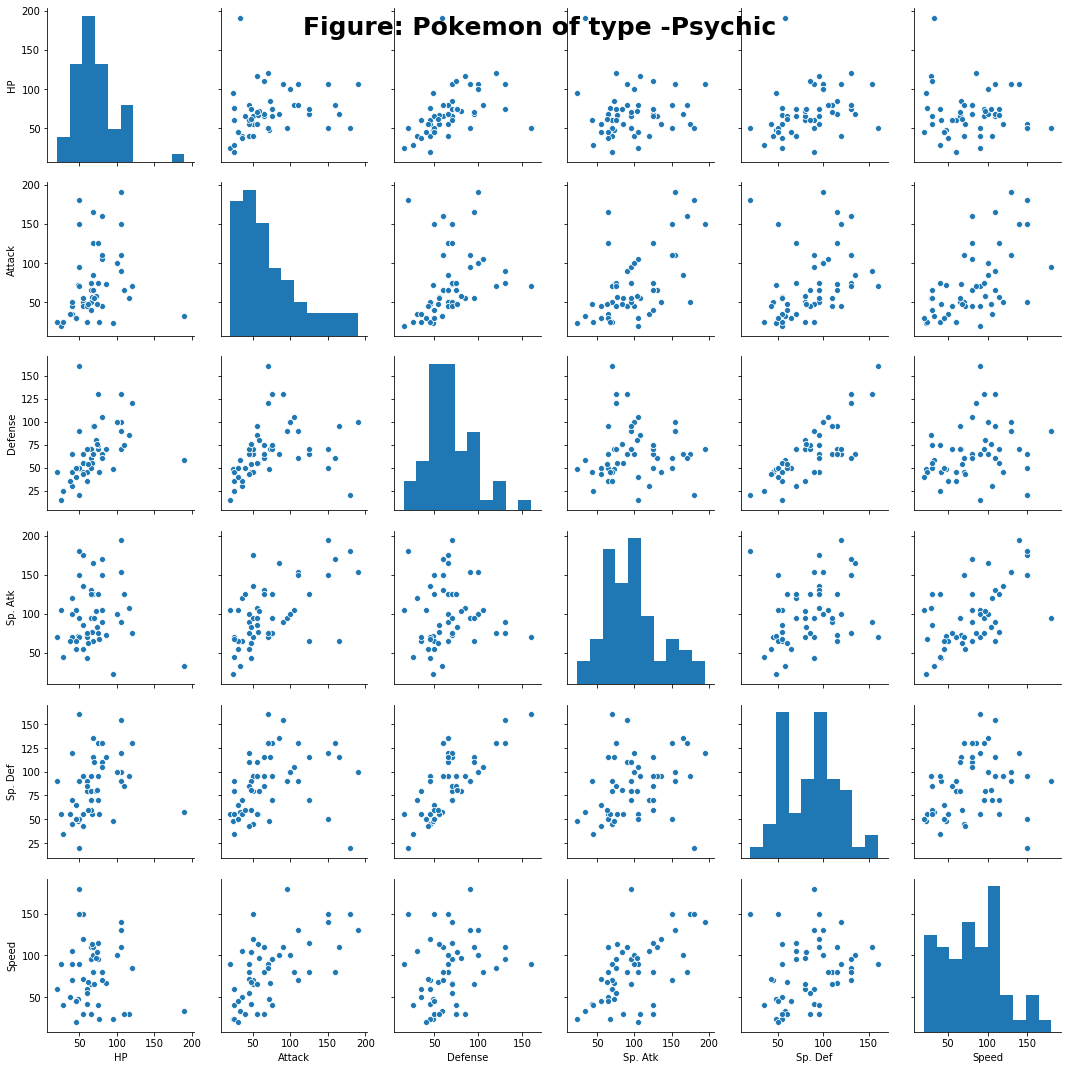

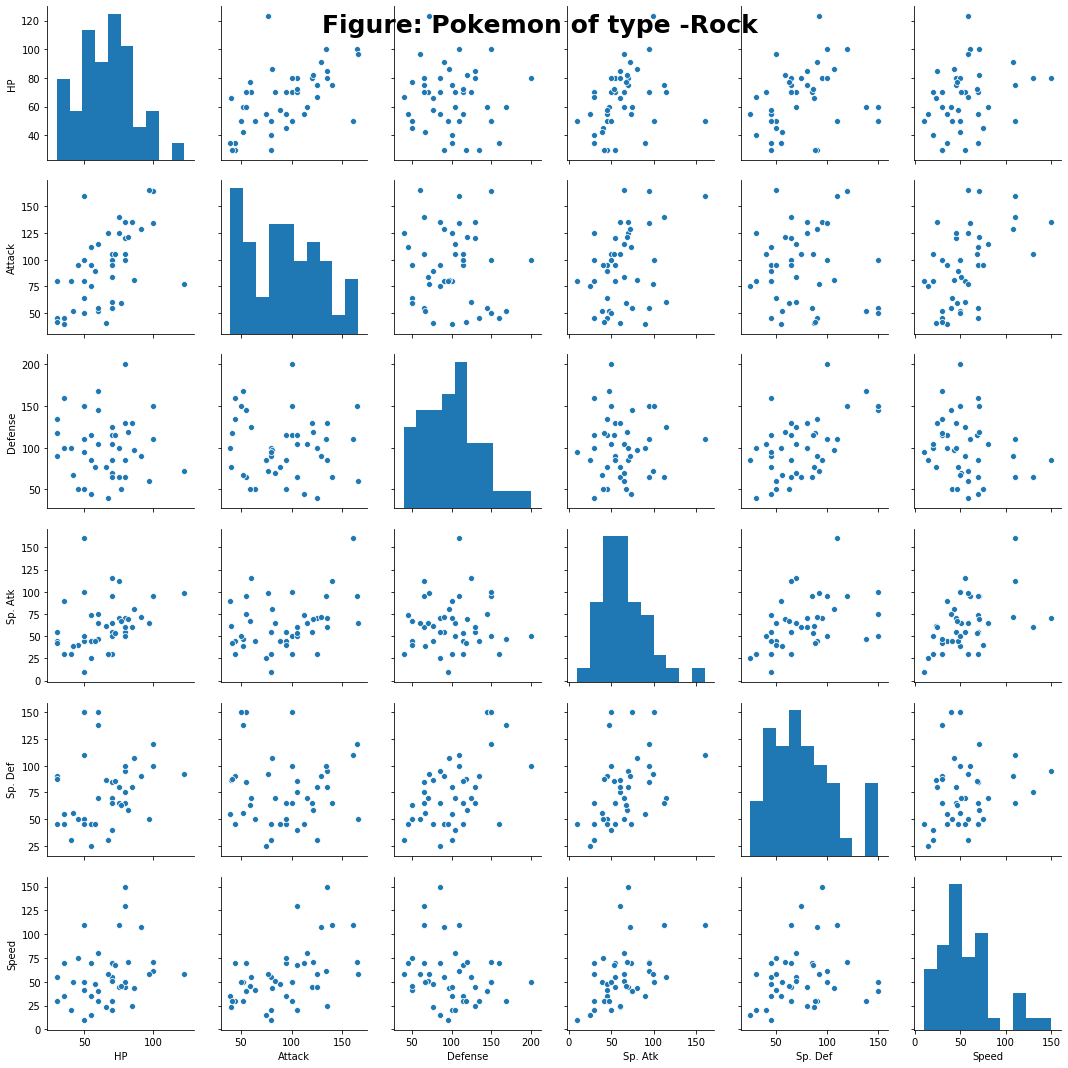

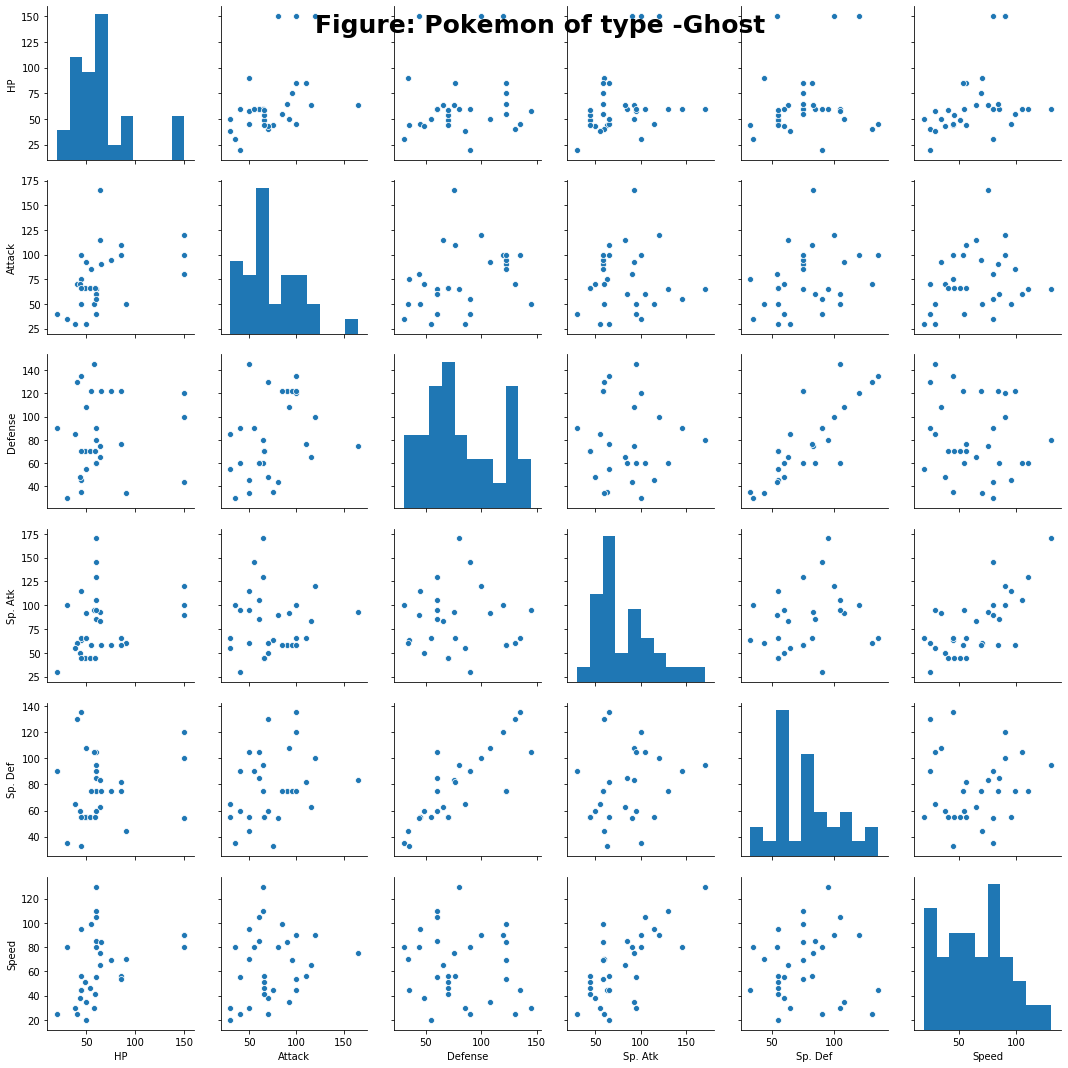

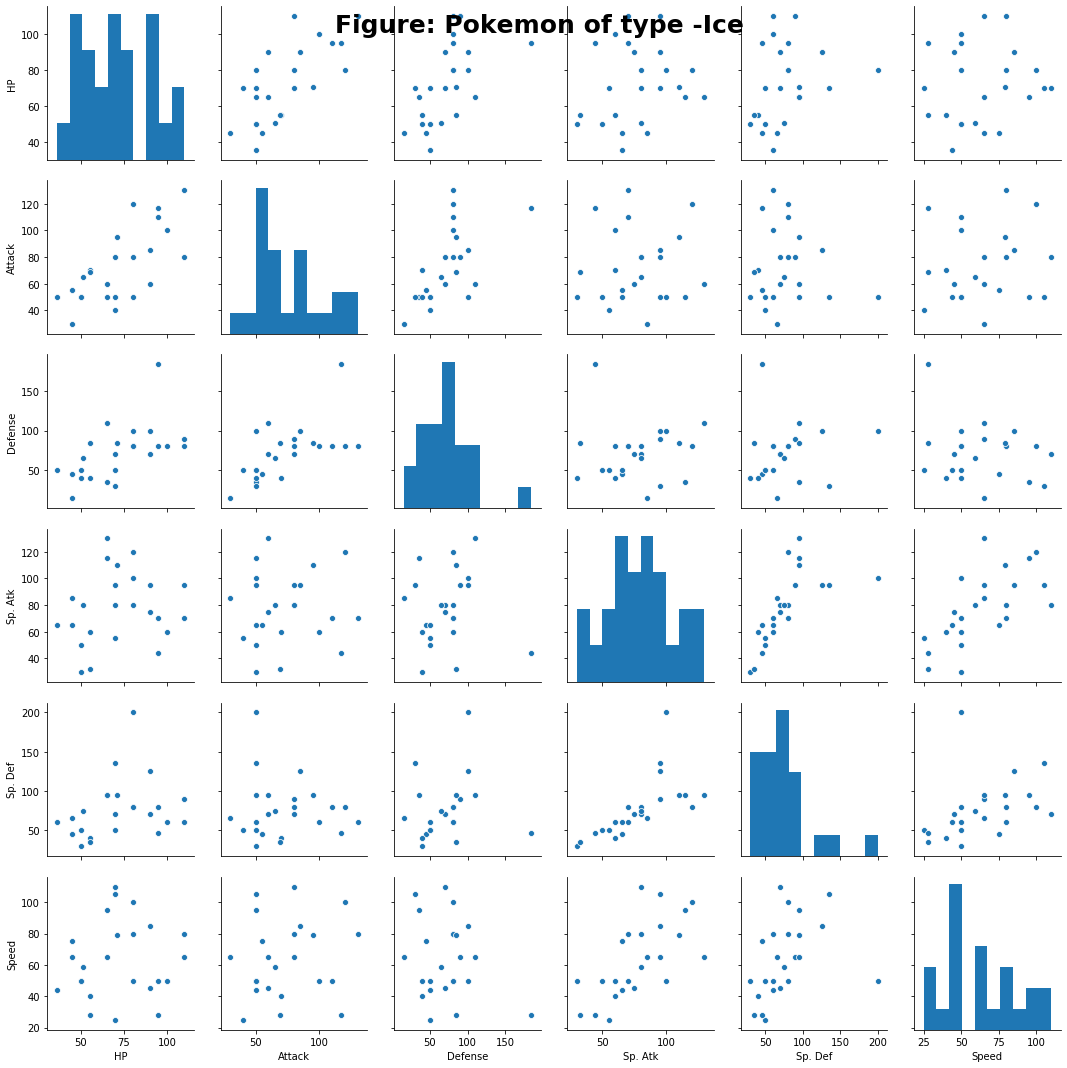

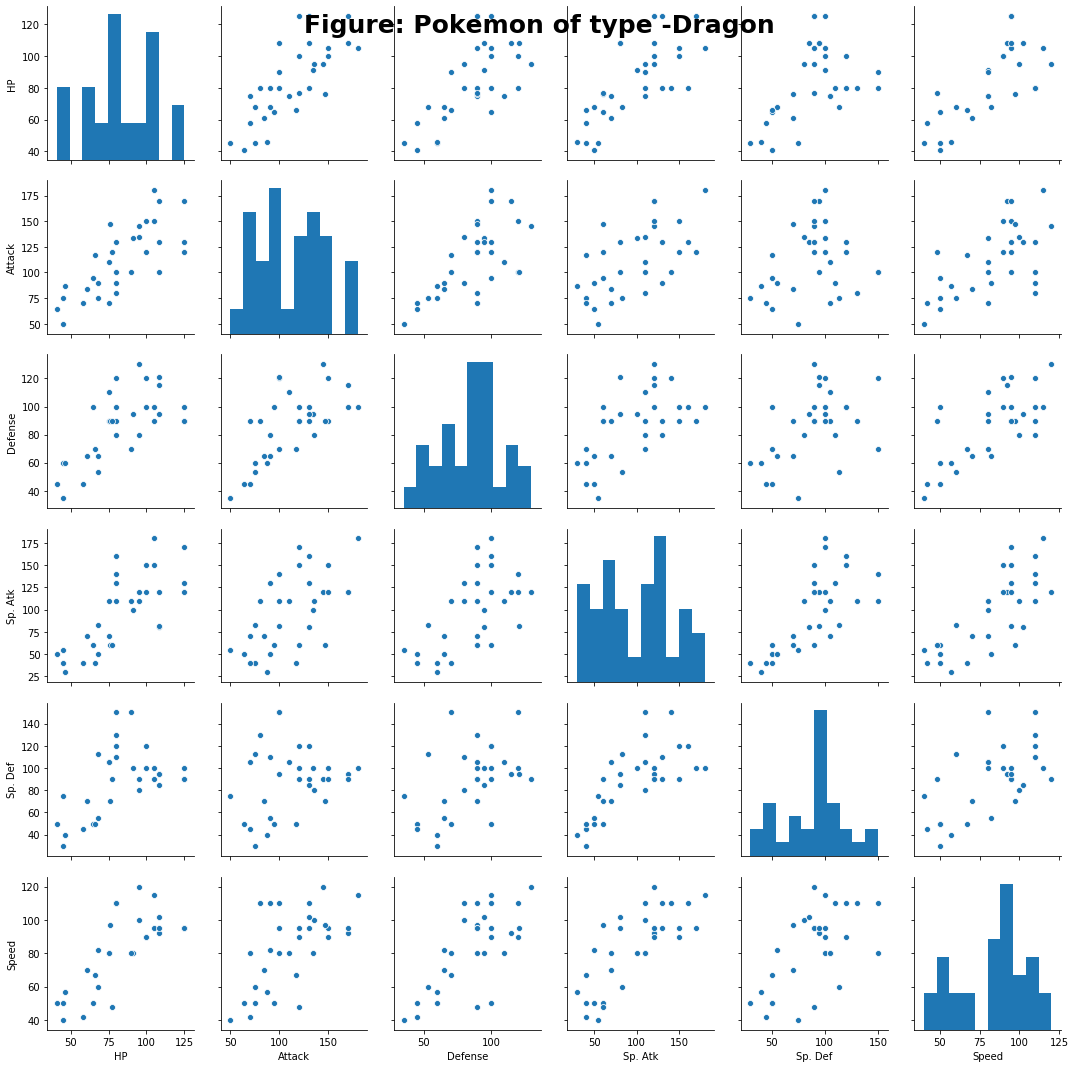

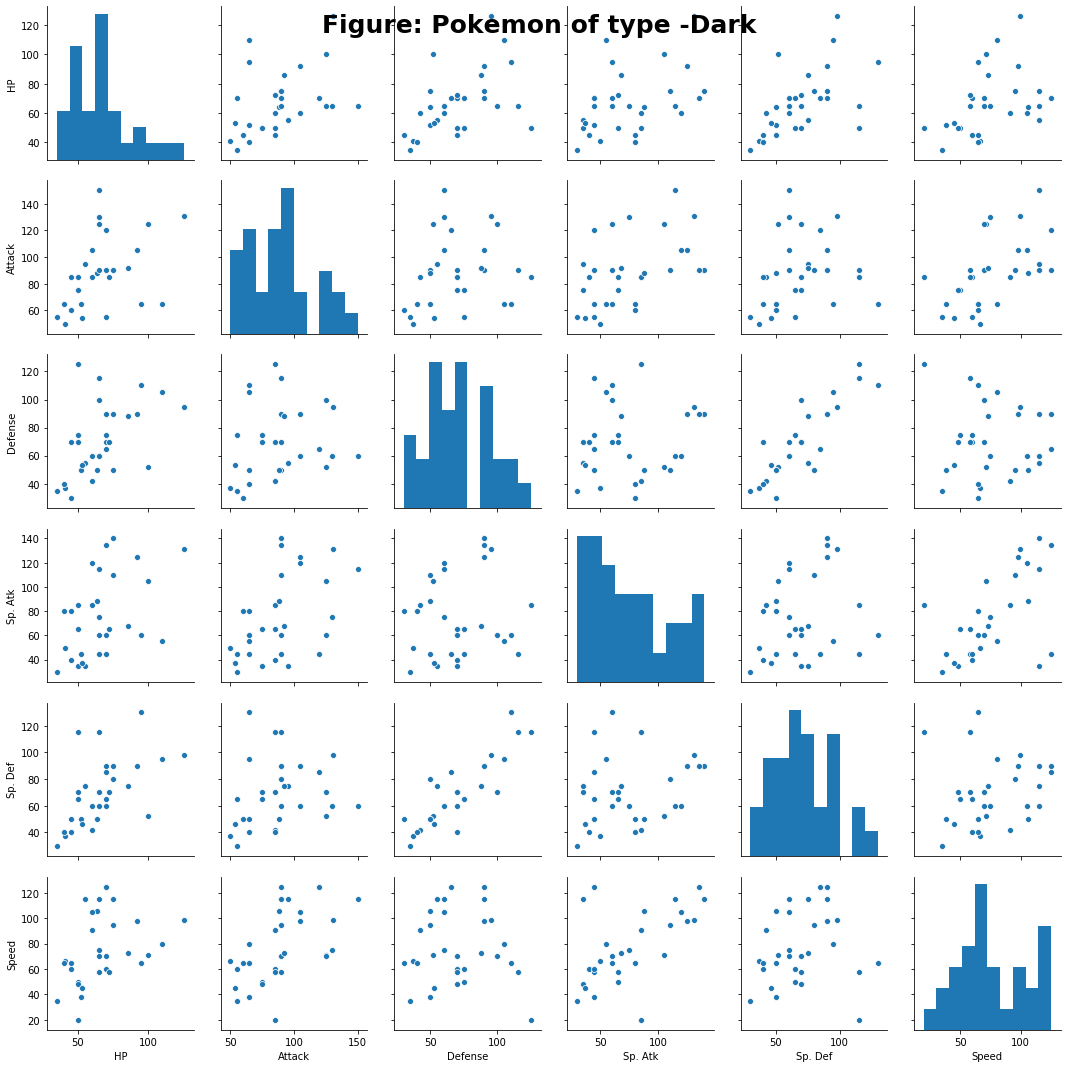

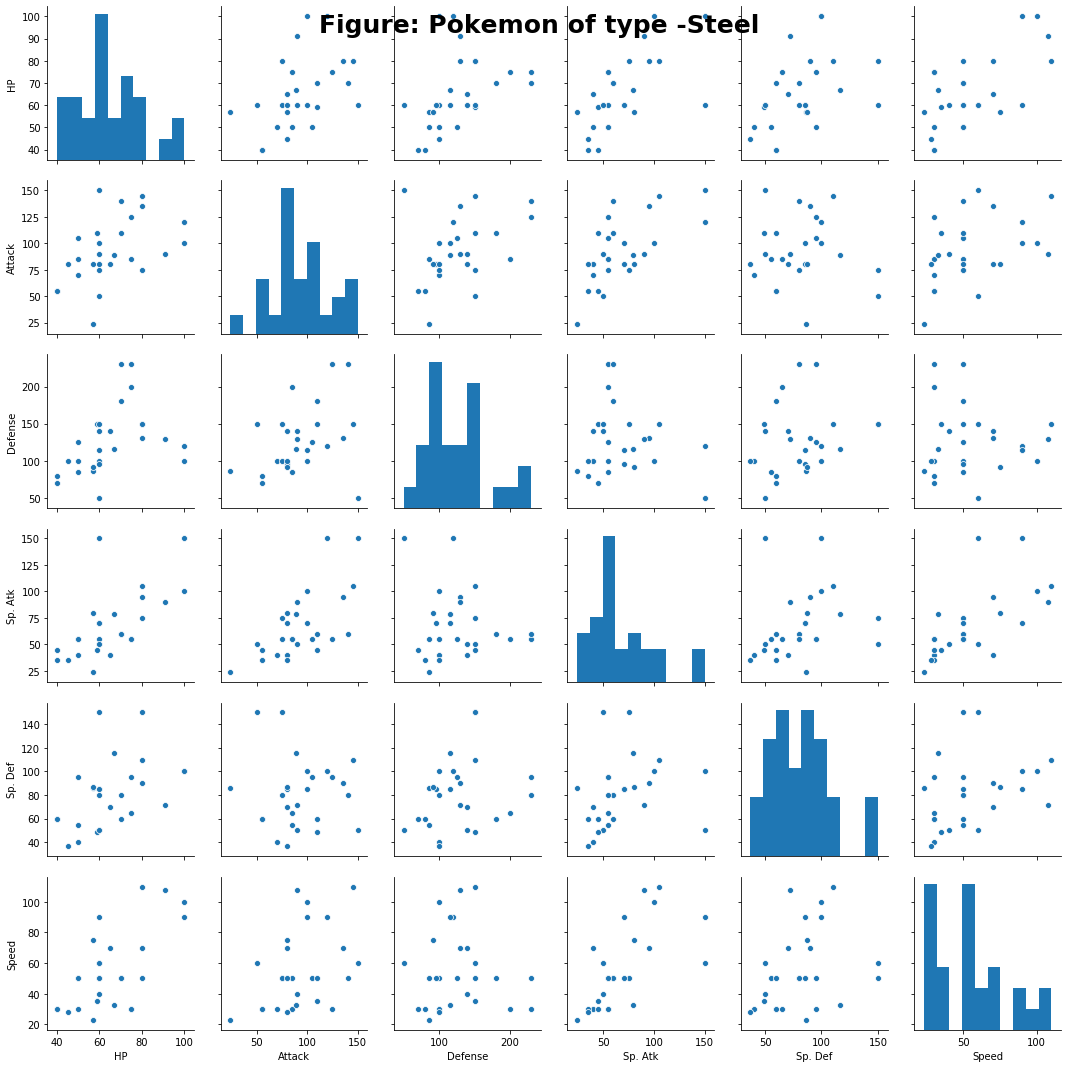

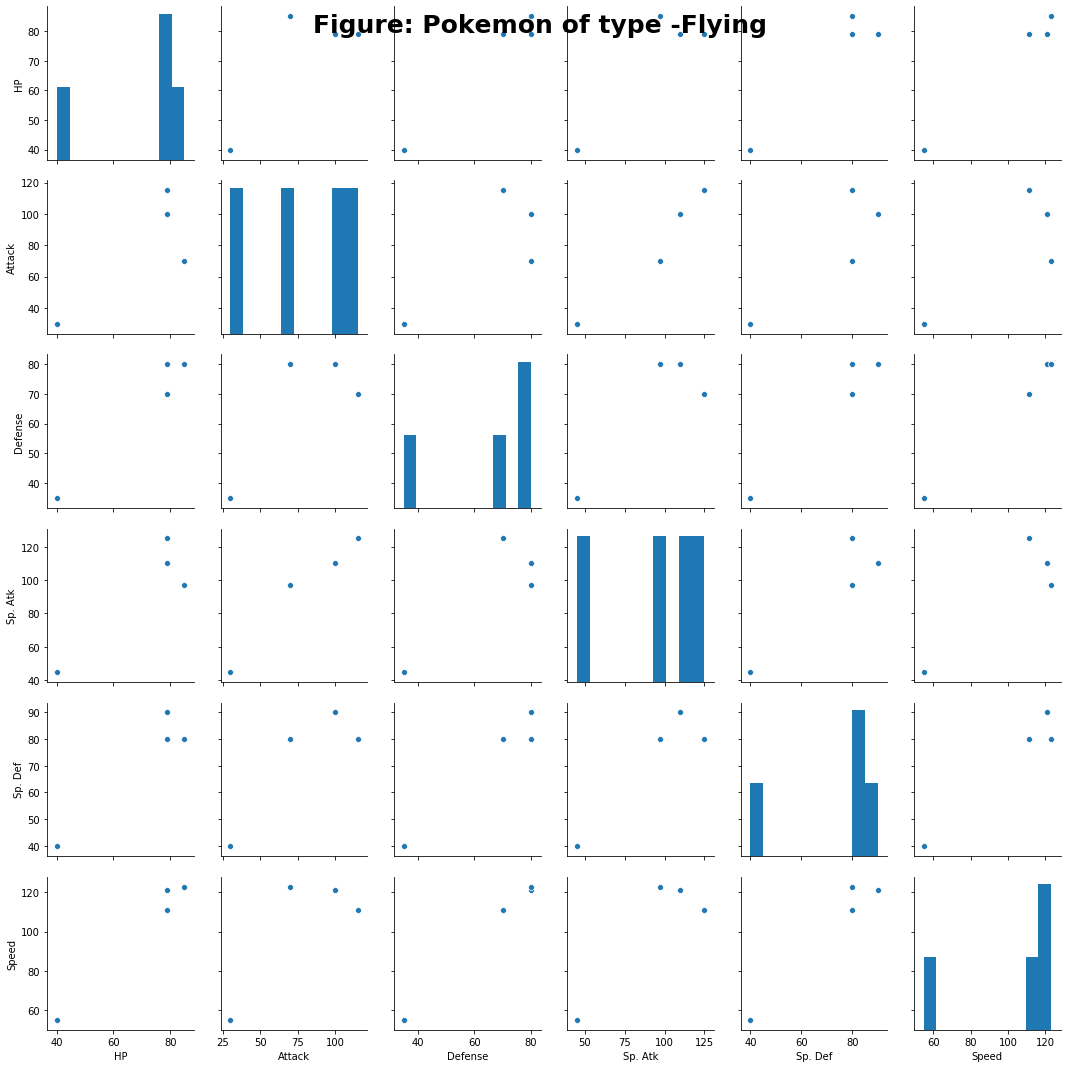

In [116]:
for x in type1_pok:
    dist_pok = Pok[Pok['Type 1'] == x]
    fig_pok= sns.pairplot(dist_pok, vars = ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']) 
    fig_pok.fig.suptitle('Figure: Pokemon of type -'+ x, verticalalignment ='top', fontsize = 25, fontweight = 'bold' )

The pairplots of each type of Pokemon gives us some eye-catching insights. The scatterplot of Flying type of pokemon shows that they are very less in number than the other types of pokemons. The scatterplot of Normal type of pokemon is densly populated thereby showing that they are high in number as compared to other type of pokemons. The flying pokemon with 120 speed are have highest frequency along with high frequencies of other abilities among all the other types of pokemons.Dragon, Ice, Ground and Bug also show fairly higher frequencies of high HP among all the types of pokemons. Some of the Steel type of pokemons display exceptional self defense ability of 150. I believe Flying, Fairy, Dragon and Electic type of pokemons are among strong fighting pokemons as their histograms show right skewness to good extent. 

### <span style="color:magenta"> Q6. For 15 Points: Explore how the Pokémon in each generation differ from each other? </span>

* Do you think designers of *Pokémon* tried to address different distributions of ability points in each generation?

In [117]:
each_gens = Pok['Generation'].unique()
each_gens

array([1, 2, 3, 4, 5, 6], dtype=int64)

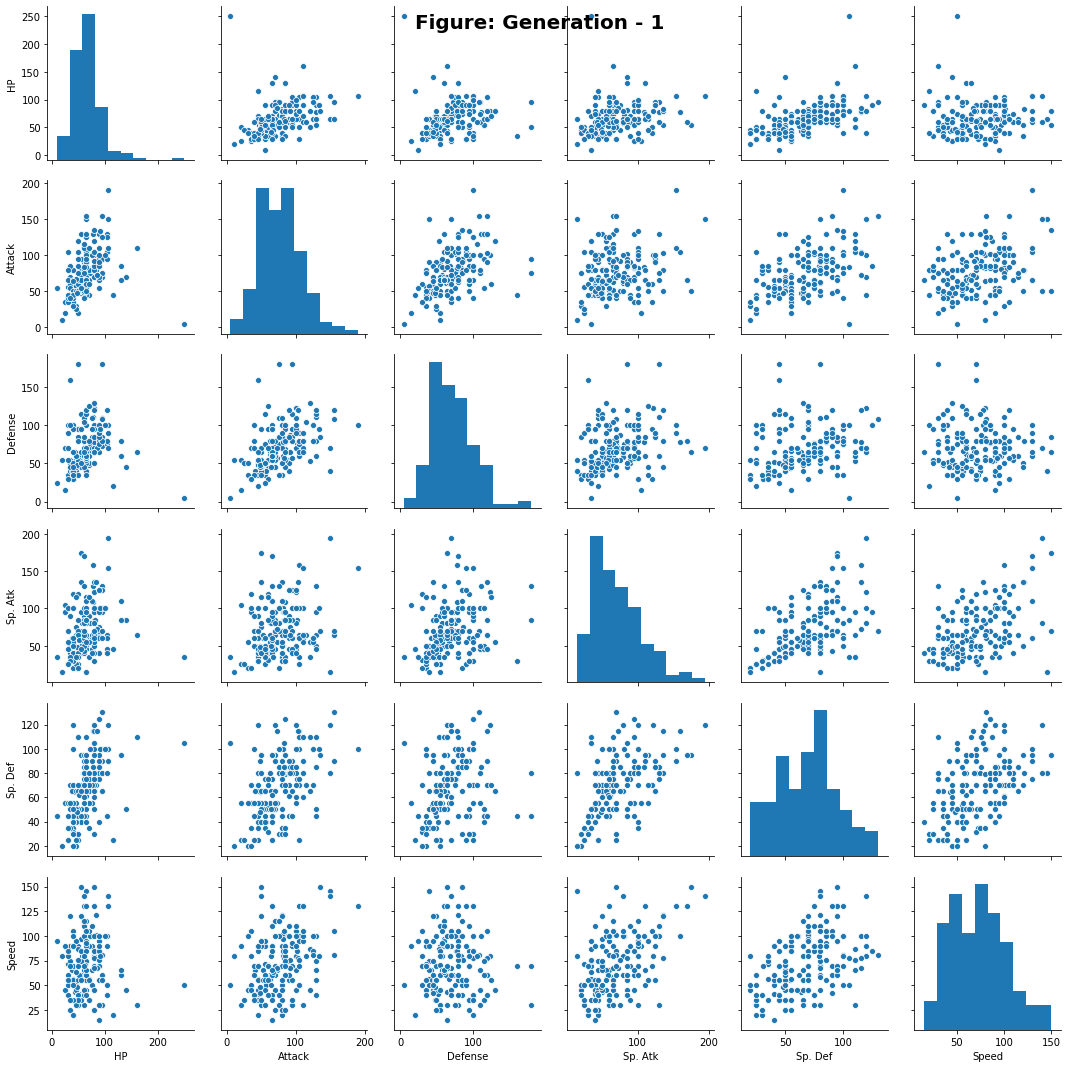

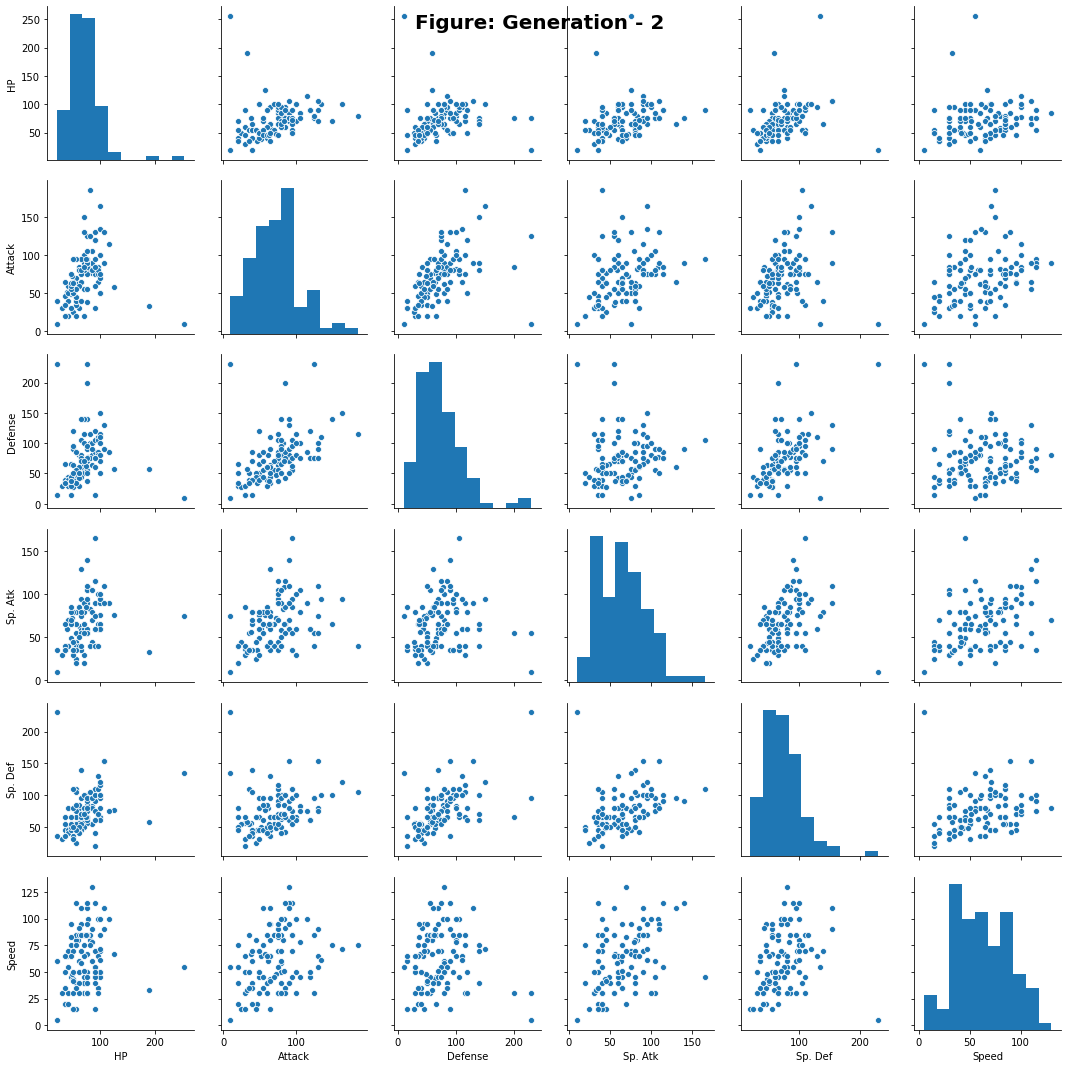

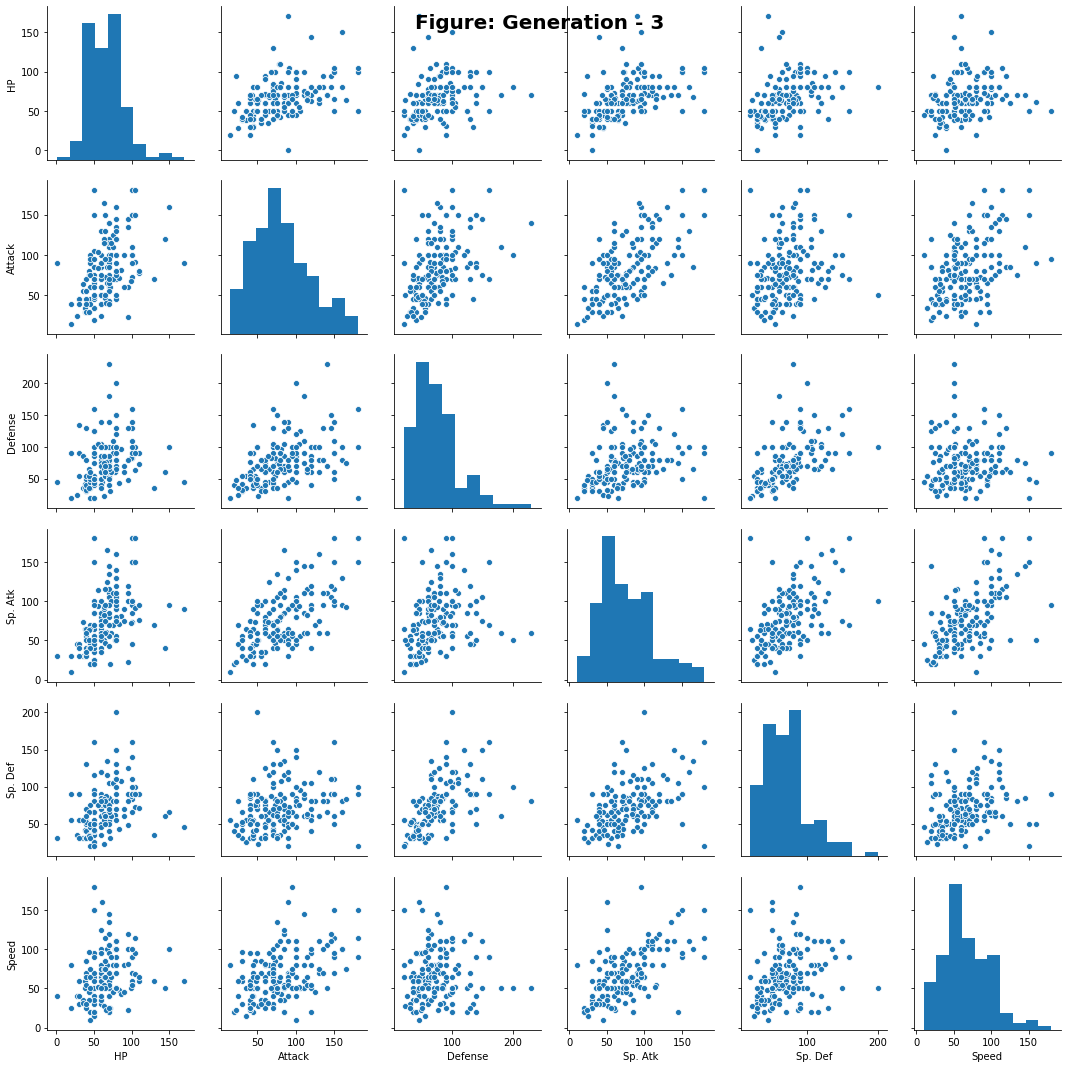

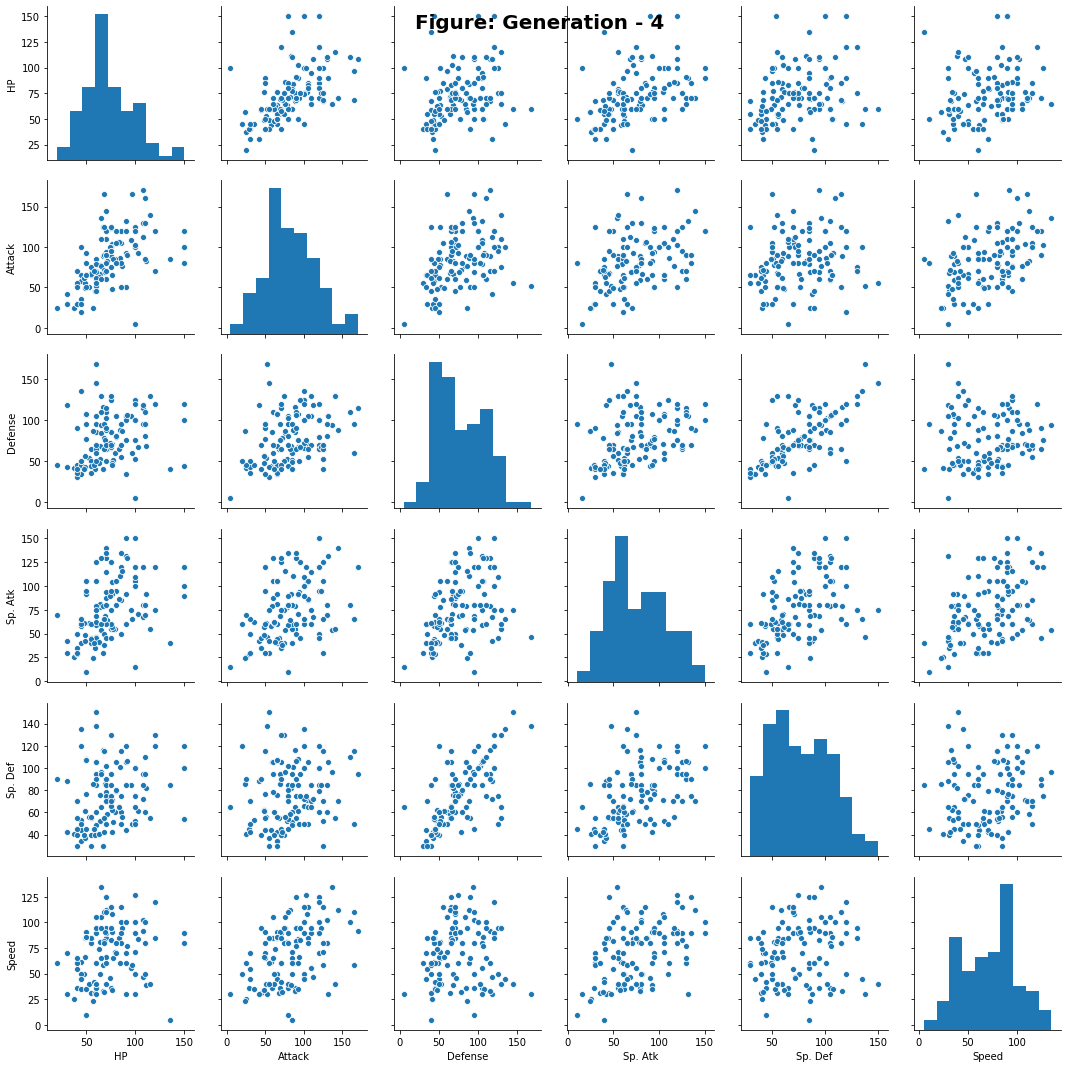

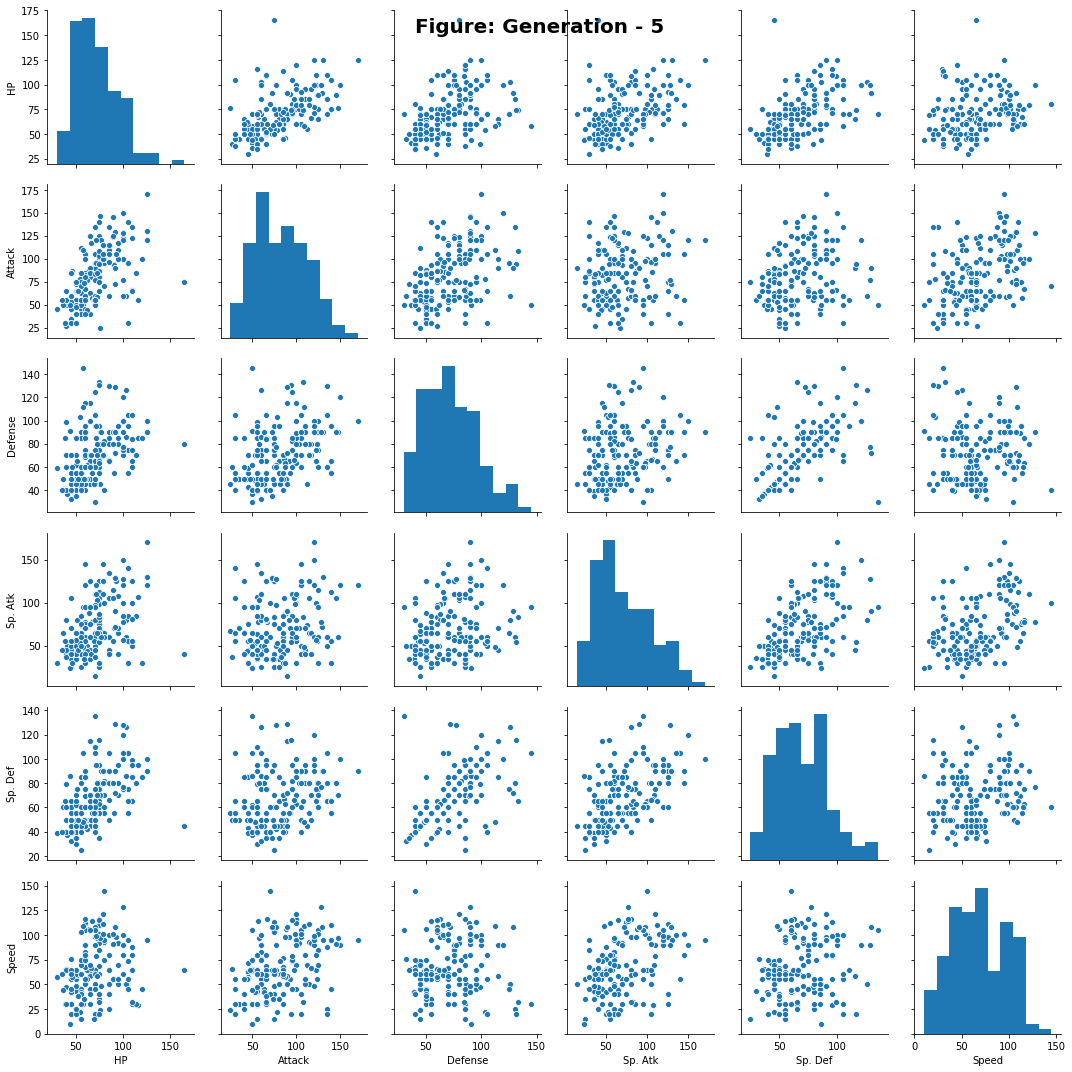

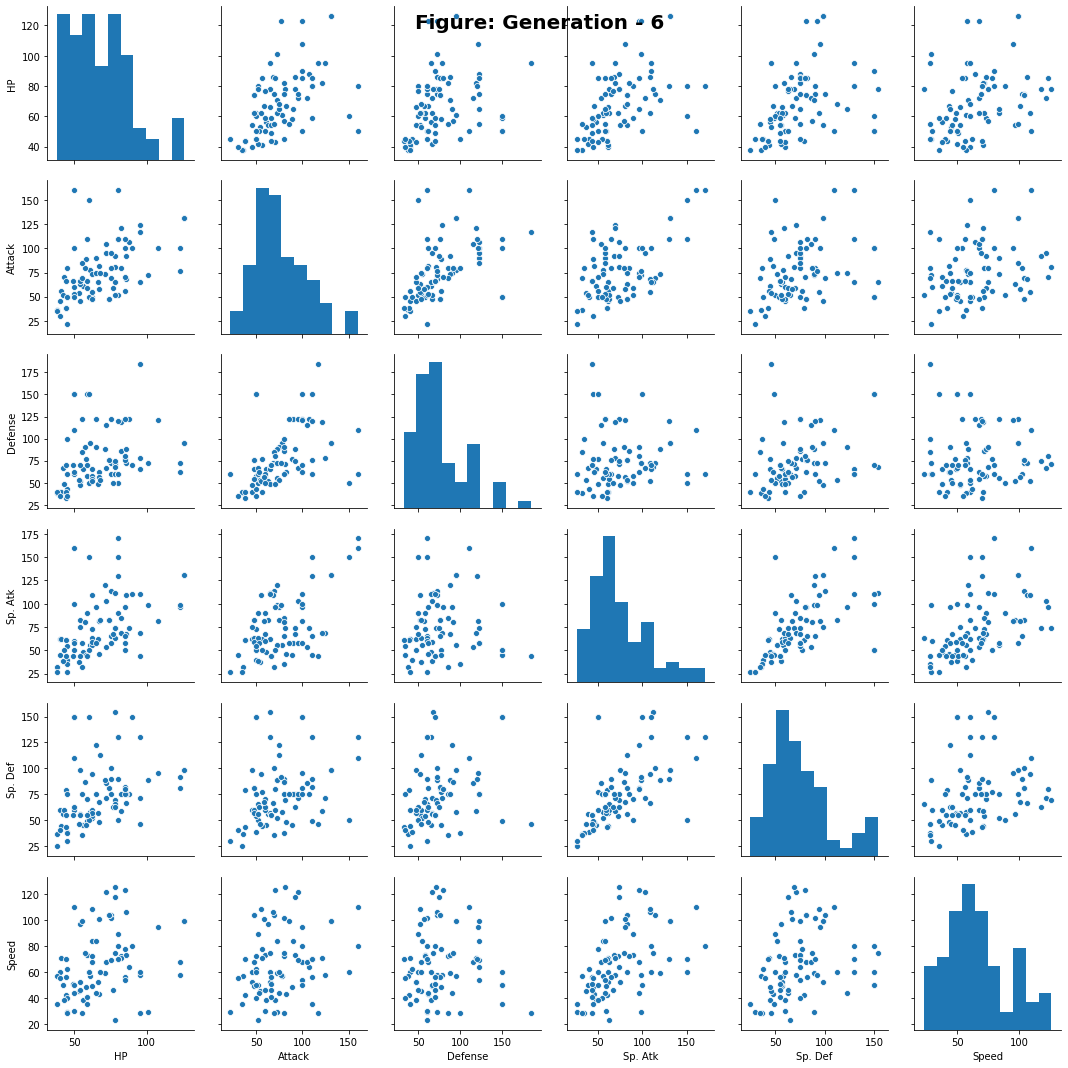

In [118]:
for x in each_gens:
    all_gens = Pok[Pok['Generation'] == x]
    gen_group = sns.pairplot(all_gens, vars=['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']) 
    gen_group.fig.suptitle('Figure: Generation - '+ str(x) , verticalalignment='top', fontsize=20, fontweight = 'bold')

Upon observing the histograms for all the generations, they show similar spread and shape. The speed ability of all the generations show high frequencies in the range 50-80 with an exception of Generation 2 that shows between 40-50 and Generation 4 that shows between 80-100.
Special defense ability shows higher freqencies of 80 in almost all the generations. Attack has the highest frequency of approximately 60 in all the six generations. Therefore I conclude that designers didn't try to use different ability points in different generations.